In [1]:
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from fitter import Fitter

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import SpectralClustering
from sklearn import tree

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import time

import synthgauge as sg

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
ds3real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ds3real.csv', index_col=0)
dsreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/dsreal.csv', index_col=0)
gbareal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gbareal.csv', index_col=0)
gcreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gcreal.csv', index_col=0)
n64real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/n64real.csv', index_col=0)
pcreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pcreal.csv', index_col=0)
ps2real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps2real.csv', index_col=0)
ps3real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps3real.csv', index_col=0)
ps4real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps4real.csv', index_col=0)
pspreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pspreal.csv', index_col=0)
psreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/psreal.csv', index_col=0)
psvreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/psvreal.csv', index_col=0)
wiireal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiireal.csv', index_col=0)
wiiureal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiiureal.csv', index_col=0)
x360real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/x360real.csv', index_col=0)
xbreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xbreal.csv', index_col=0)
xonereal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xonereal.csv', index_col=0)

In [3]:
ds3syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ds3syn.csv')
dssyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/dssyn.csv')
gbasyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gbasyn.csv')
gcsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gcsyn.csv')
n64syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/n64syn.csv')
pcsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pcsyn.csv')
ps2syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps2syn.csv')
ps3syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps3syn.csv')
ps4syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps4syn.csv')
pspsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pspsyn.csv')
pssyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pssyn.csv')
psvsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/psvsyn.csv')
wiisyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiisyn.csv')
wiiusyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiiusyn.csv')
x360syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/x360syn.csv')
xbsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xbsyn.csv')
xonesyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xonesyn.csv')

In [94]:
evaluator = sg.Evaluator(ds3real, ds3syn)
evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,152.0,67.434211,12.445734,26.000000,58.750000,69.000000,77.000000,9.200000e+01
Calificacion_critica_synth,1500.0,67.723475,12.064937,26.111637,59.666647,68.403857,76.586340,9.581780e+01
Ventas_norteamerica_real,152.0,324802.631579,673506.166872,10000.000000,80000.000000,150000.000000,302500.000000,5.030000e+06
Ventas_norteamerica_synth,1500.0,303289.191452,519098.347150,-48233.942088,74124.253227,142276.977056,313886.410572,9.417704e+06


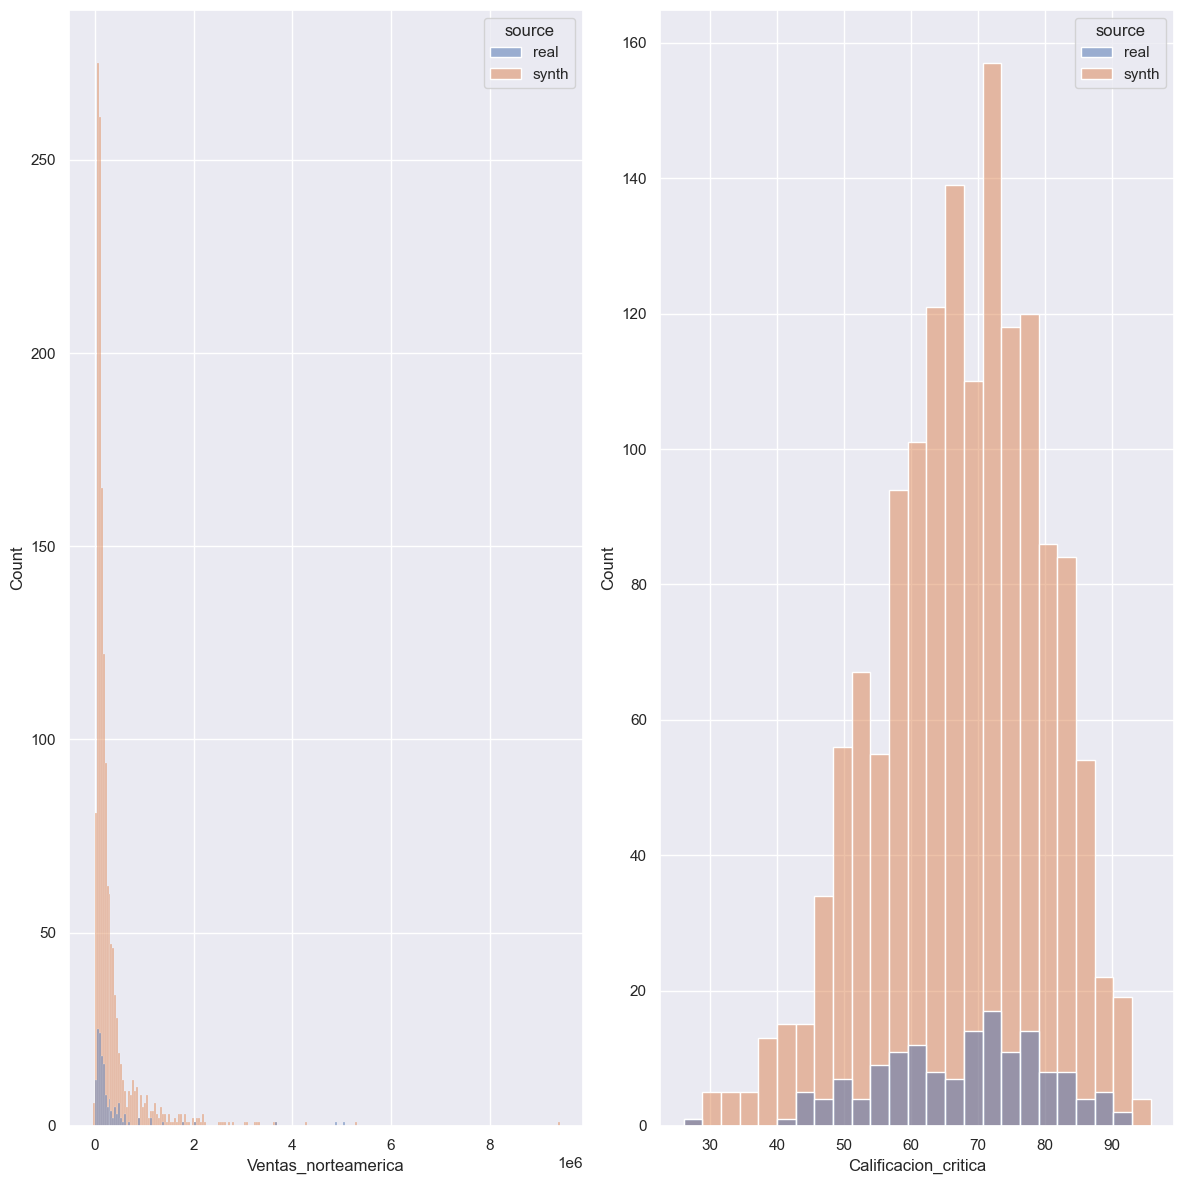

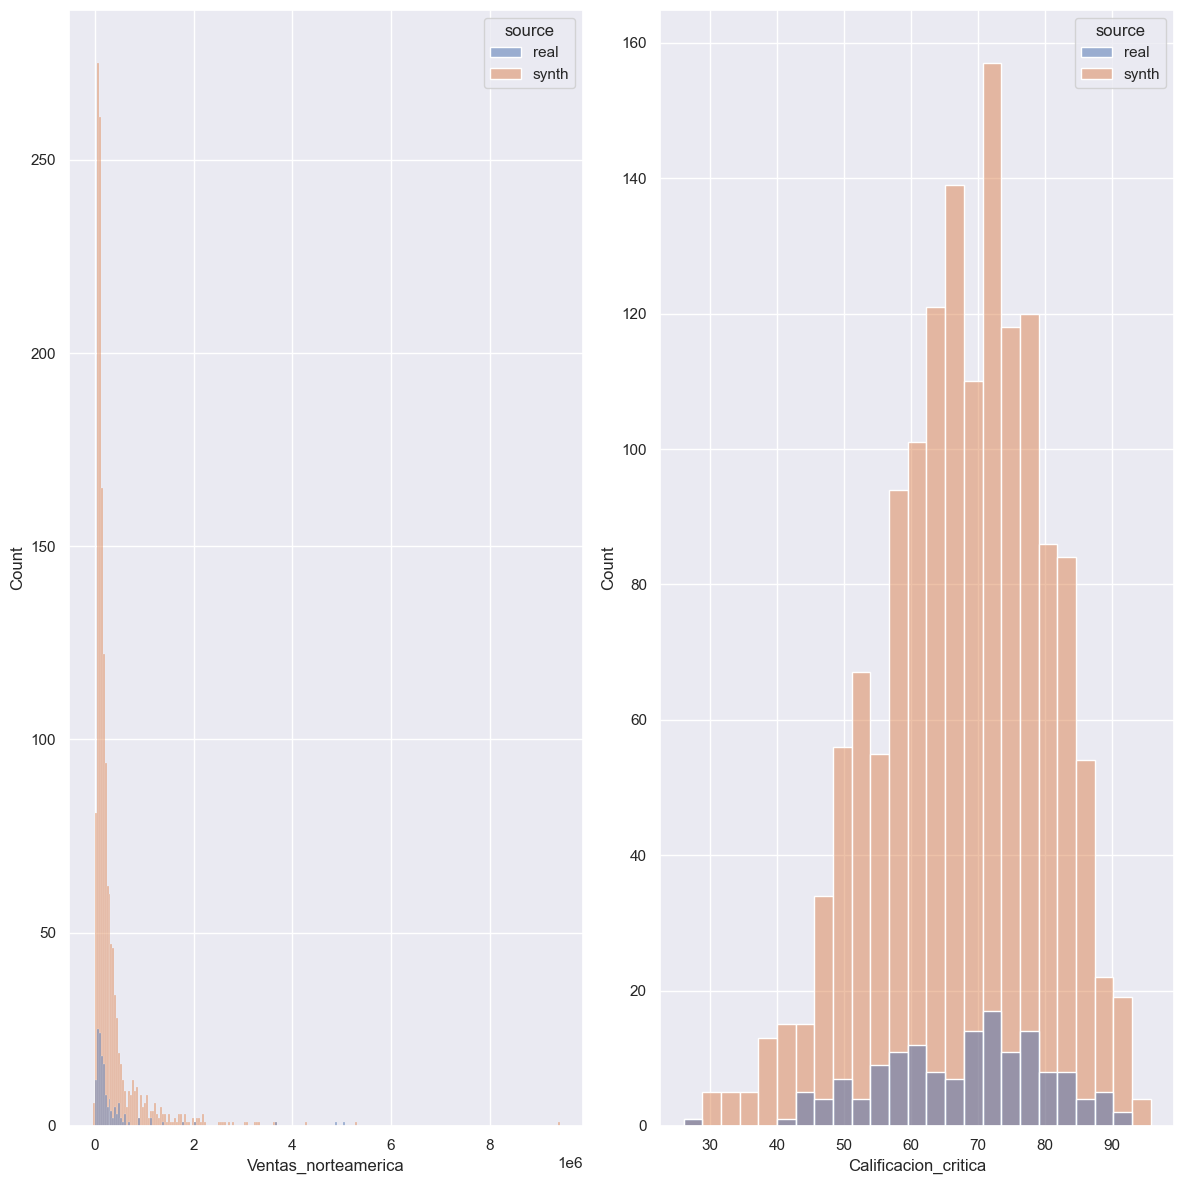

In [95]:
evaluator.plot_histograms(figsize=(12, 12))

In [96]:
for feat in ("Calificacion_critica", "Ventas_norteamerica"):
    evaluator.add_metric("wasserstein", alias=f"wass-{feat}", feature=feat)

for feat in ("Calificacion_critica", "Ventas_norteamerica"):
    evaluator.add_metric("kolmogorov_smirnov", alias=f"kolmogorov-{feat}", feature=feat)

evaluator.add_metric("propensity_metrics")
evaluator.add_metric("correlation_msd", alias="pearson-msd")

evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,0.797442
wass-Ventas_norteamerica,60304.429050
kolmogorov-Calificacion_critica-statistic,0.053526
kolmogorov-Calificacion_critica-pvalue,0.802027
kolmogorov-Ventas_norteamerica-statistic,0.048456
kolmogorov-Ventas_norteamerica-pvalue,0.884913
propensity_metrics-pmse,0.083544
propensity_metrics-pmse_standardised,0.743311
propensity_metrics-pmse_ratio,1.001997
pearson-msd,0.146308


In [97]:
comparison_evaluator = sg.Evaluator(dsreal, dssyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,702.0,63.782051,13.580512,19.000000,56.000000,66.000000,73.000000,9.300000e+01
Calificacion_critica_synth,1500.0,63.870969,14.190053,-15.102618,55.311669,63.320410,72.563129,1.256668e+02
Ventas_norteamerica_real,702.0,295028.490028,705642.784671,10000.000000,60000.000000,120000.000000,280000.000000,1.128000e+07
Ventas_norteamerica_synth,1500.0,277418.373592,633725.232013,6545.783719,57269.476960,118613.875325,276504.280181,1.079583e+07


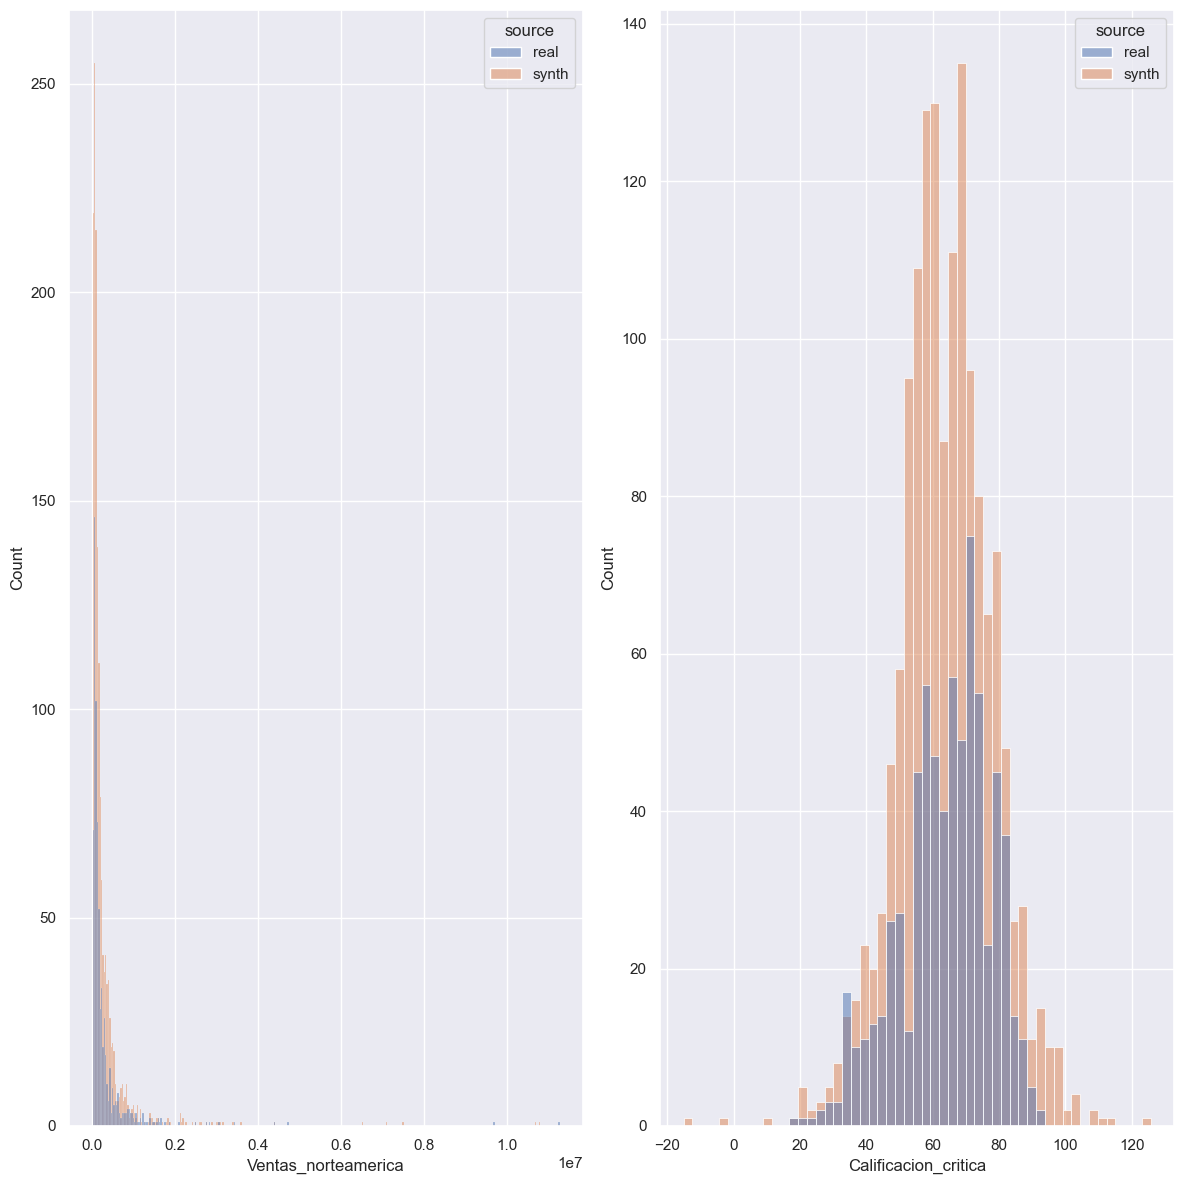

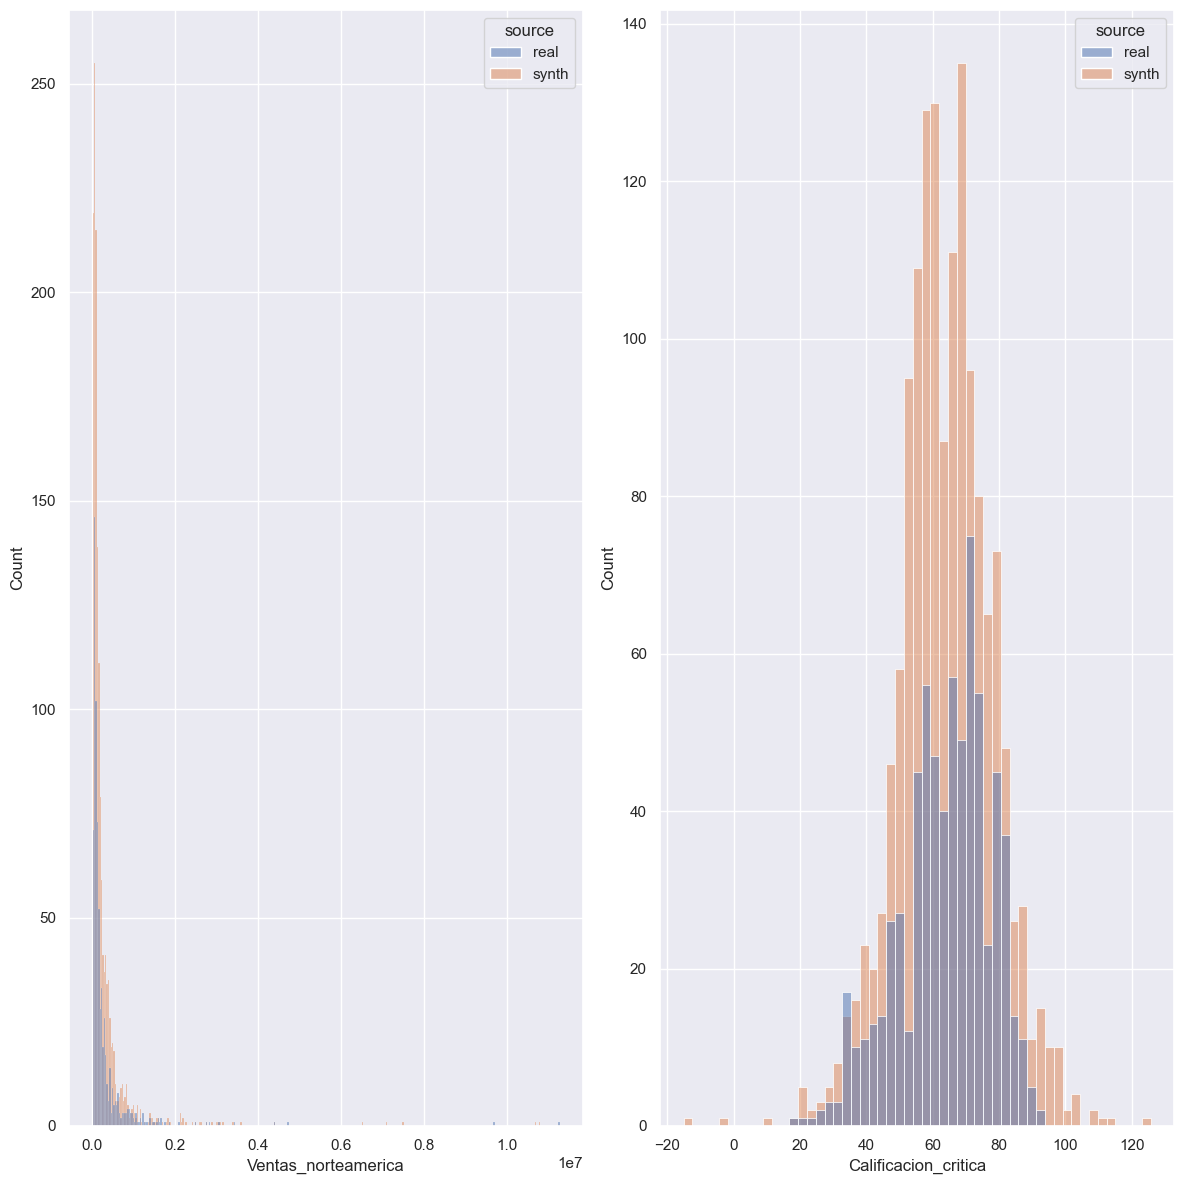

In [98]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [99]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,1.676537
wass-Ventas_norteamerica,26867.426223
kolmogorov-Calificacion_critica-statistic,0.072621
kolmogorov-Calificacion_critica-pvalue,0.012111
kolmogorov-Ventas_norteamerica-statistic,0.065236
kolmogorov-Ventas_norteamerica-pvalue,0.032298
propensity_metrics-pmse,0.204201
propensity_metrics-pmse_standardised,-0.060933
propensity_metrics-pmse_ratio,0.999483
pearson-msd,0.035969


In [100]:
comparison_evaluator = sg.Evaluator(gbareal, gbasyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,434.0,67.253456,13.270861,23.000000,58.000000,69.000000,77.000000,9.500000e+01
Calificacion_critica_synth,1500.0,67.482889,13.906179,10.553792,60.227350,70.363600,77.100733,1.022913e+02
Ventas_norteamerica_real,434.0,245576.036866,389670.631306,10000.000000,40000.000000,110000.000000,297500.000000,3.140000e+06
Ventas_norteamerica_synth,1500.0,241441.048316,348569.776184,5671.609580,37323.303918,96320.913535,298660.274562,3.679708e+06


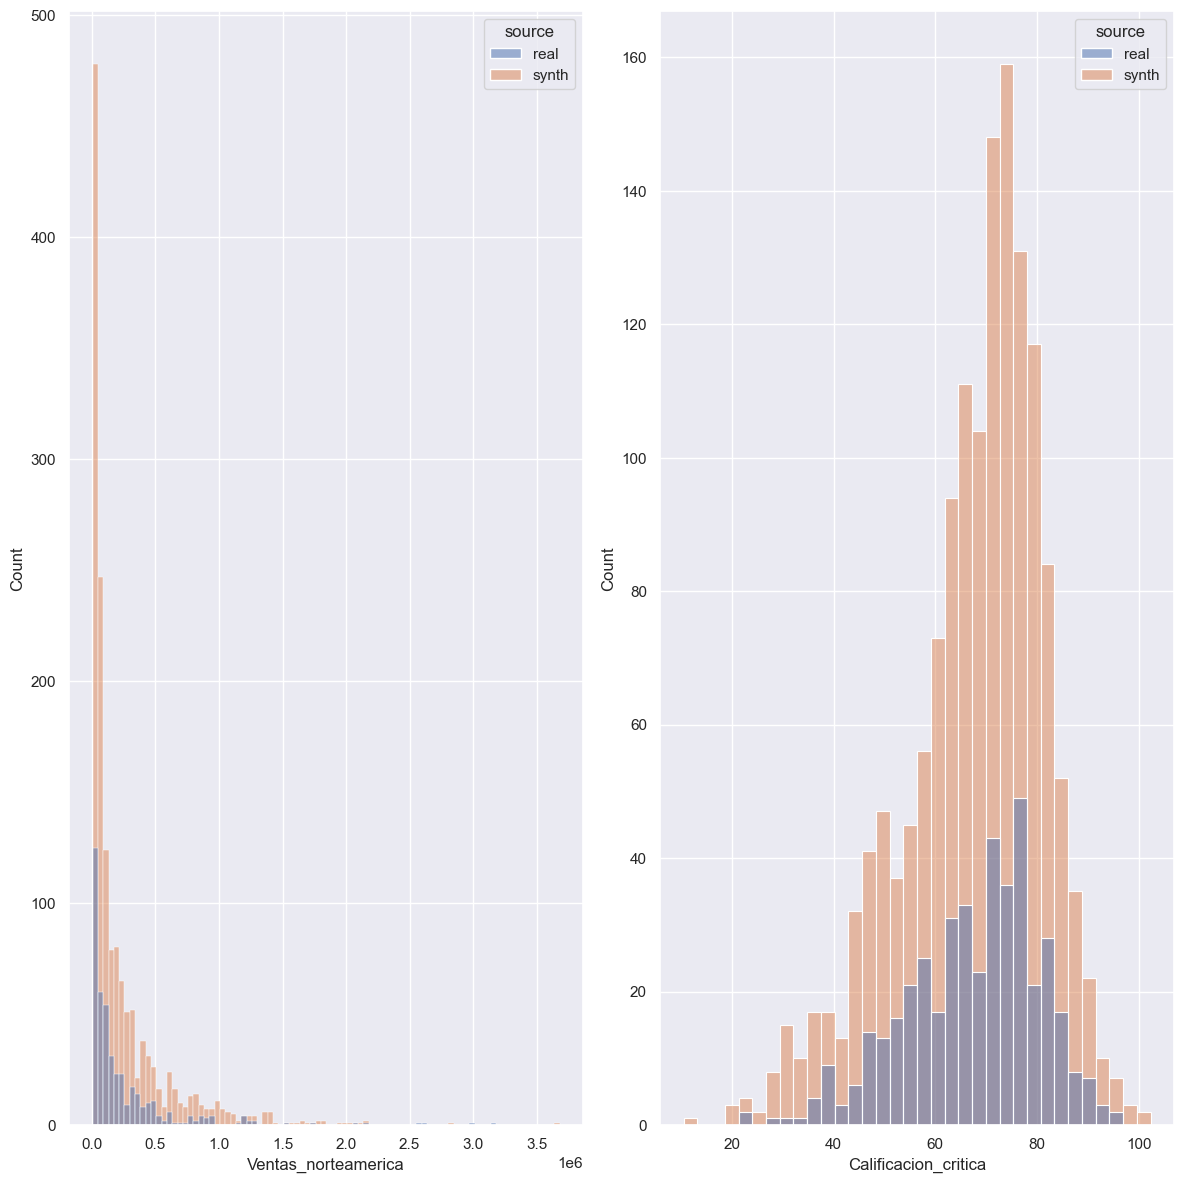

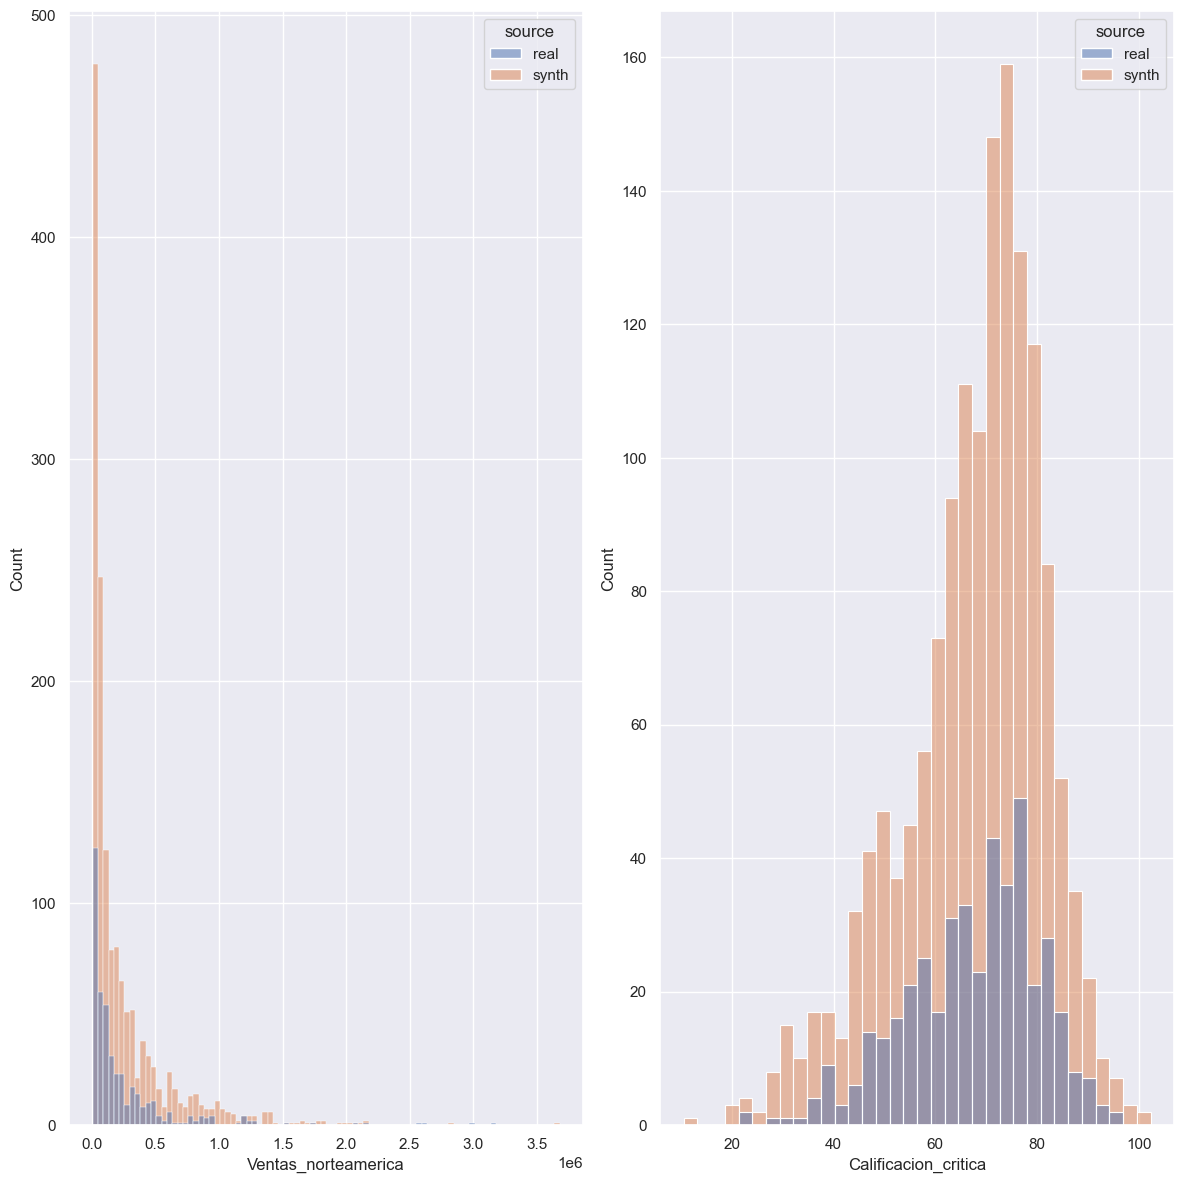

In [101]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [102]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,1.037484
wass-Ventas_norteamerica,26128.853197
kolmogorov-Calificacion_critica-statistic,0.054043
kolmogorov-Calificacion_critica-pvalue,0.267634
kolmogorov-Ventas_norteamerica-statistic,0.061840
kolmogorov-Ventas_norteamerica-pvalue,0.145014
propensity_metrics-pmse,0.169222
propensity_metrics-pmse_standardised,0.757153
propensity_metrics-pmse_ratio,1.002732
pearson-msd,0.039730


In [103]:
comparison_evaluator = sg.Evaluator(gcreal, gcsyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,447.0,69.510067,1.344710e+01,23.000000,61.000000,70.000000,80.000000,9.700000e+01
Calificacion_critica_synth,1500.0,69.491253,1.349375e+01,23.066823,60.768632,70.790106,79.444669,9.717125e+01
Ventas_norteamerica_real,447.0,262102.908277,4.212048e+05,10000.000000,60000.000000,120000.000000,300000.000000,4.410000e+06
Ventas_norteamerica_synth,1500.0,491655.693677,6.309779e+06,10094.405256,61353.662212,140086.474022,318635.490069,2.406664e+08


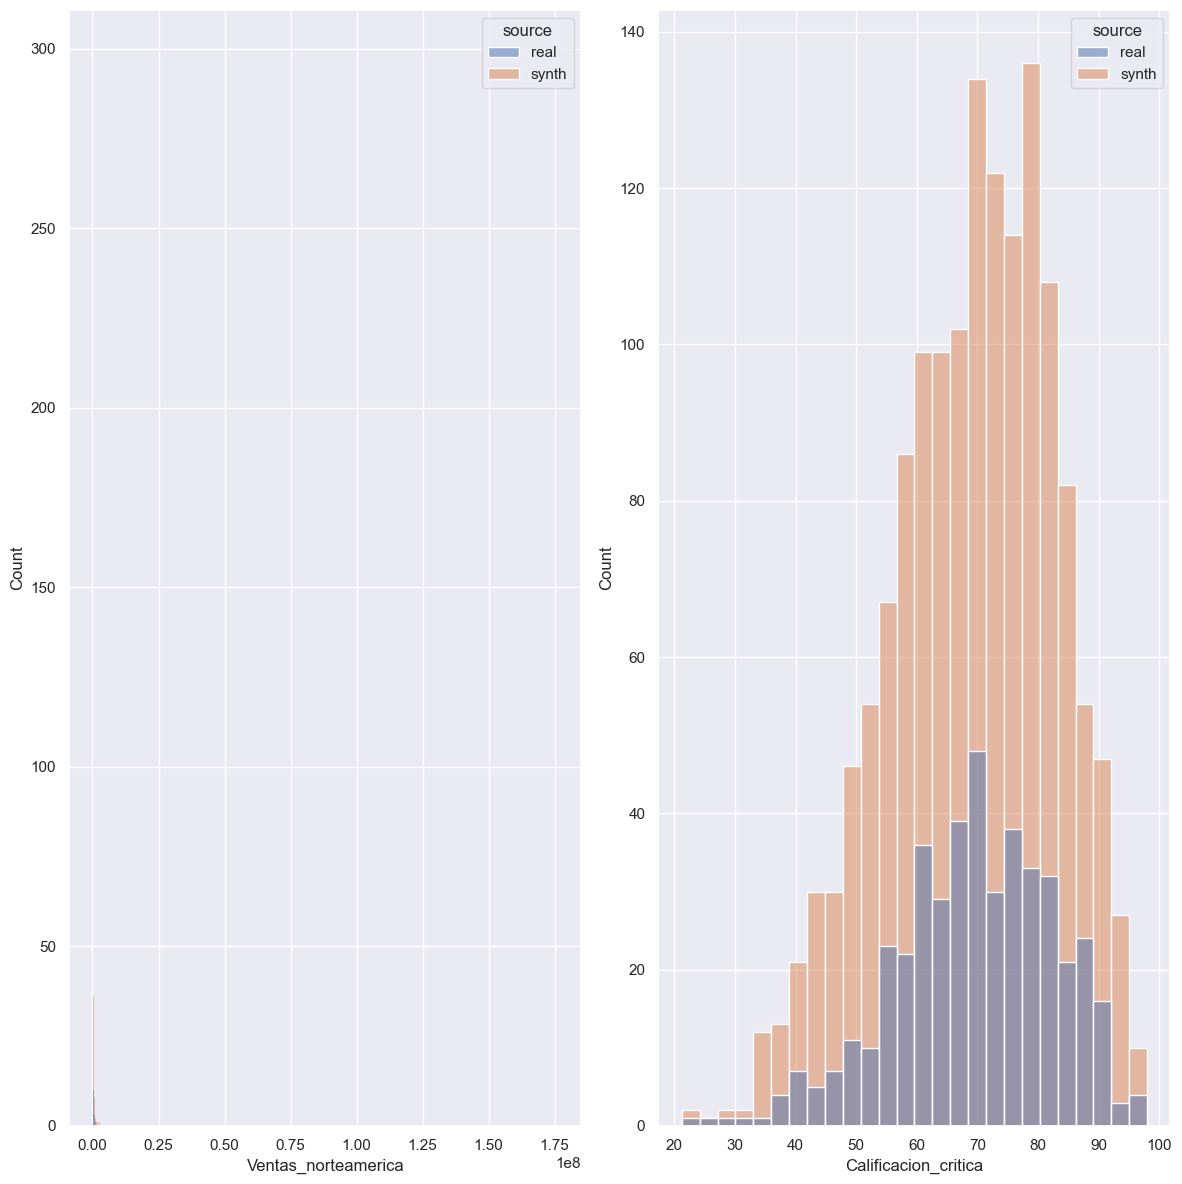

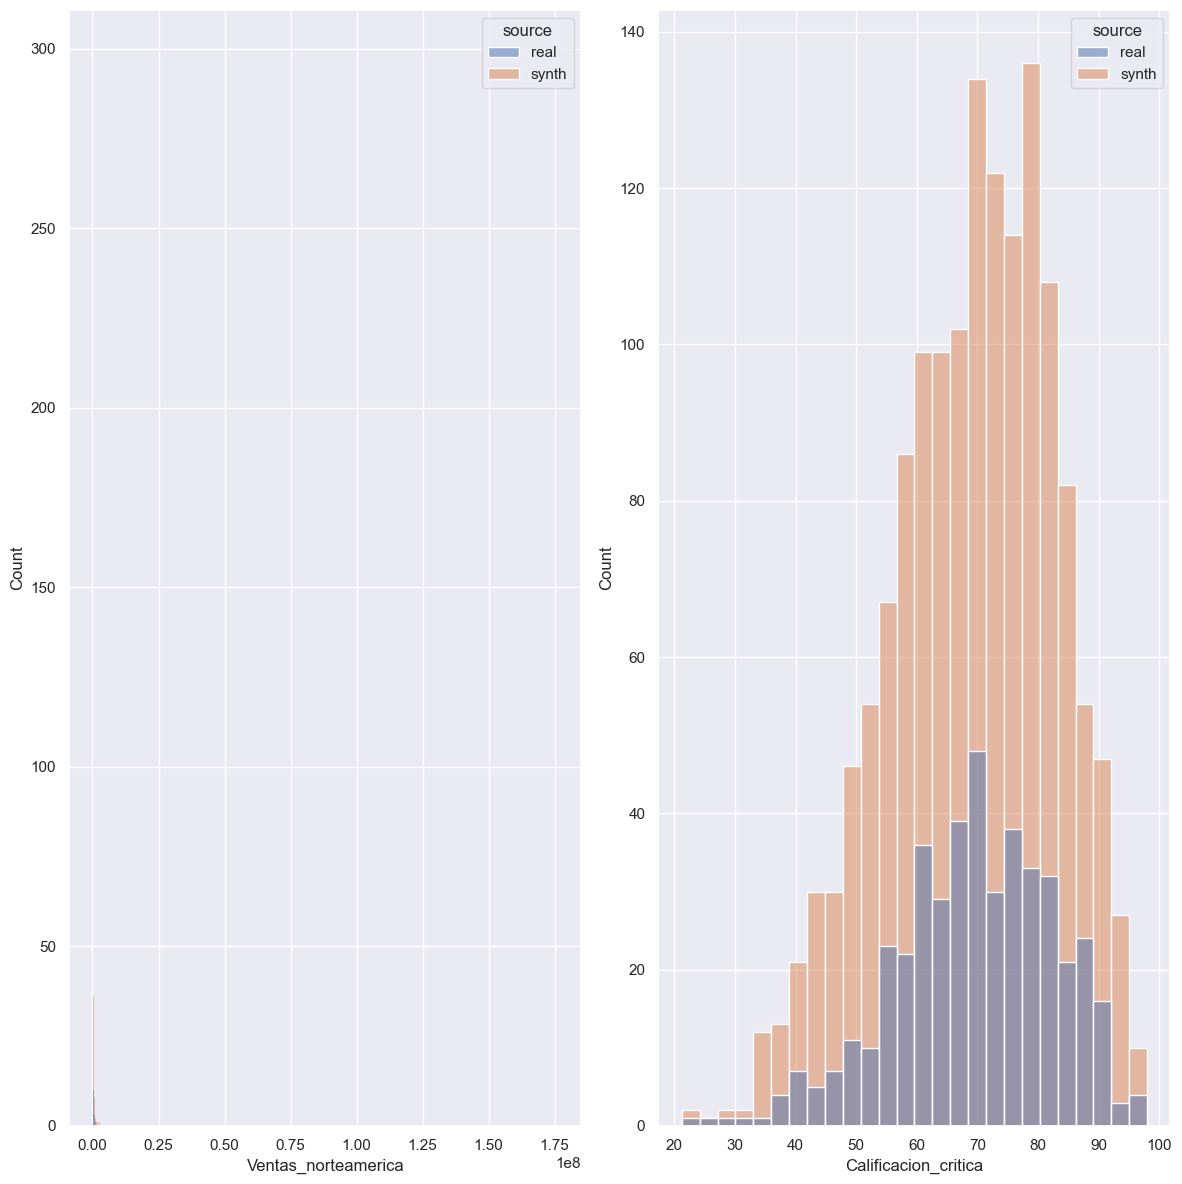

In [47]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [104]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,0.532439
wass-Ventas_norteamerica,230122.917271
kolmogorov-Calificacion_critica-statistic,0.041669
kolmogorov-Calificacion_critica-pvalue,0.570779
kolmogorov-Ventas_norteamerica-statistic,0.067629
kolmogorov-Ventas_norteamerica-pvalue,0.081159
propensity_metrics-pmse,0.171054
propensity_metrics-pmse_standardised,-0.643112
propensity_metrics-pmse_ratio,0.996385
pearson-msd,0.114972


In [105]:
comparison_evaluator = sg.Evaluator(n64real, n64syn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,56.0,8.148214e+01,1.020871e+01,57.000000,76.500000,82.500000,9.000000e+01,9.900000e+01
Calificacion_critica_synth,1500.0,8.155350e+01,1.010393e+01,53.862170,74.276289,83.161986,8.948867e+01,1.001219e+02
Ventas_norteamerica_real,56.0,1.200000e+06,1.487152e+06,10000.000000,357500.000000,605000.000000,1.415000e+06,6.910000e+06
Ventas_norteamerica_synth,1500.0,2.850649e+06,2.366463e+07,1227.070308,318250.863091,615989.209440,1.243589e+06,5.787933e+08


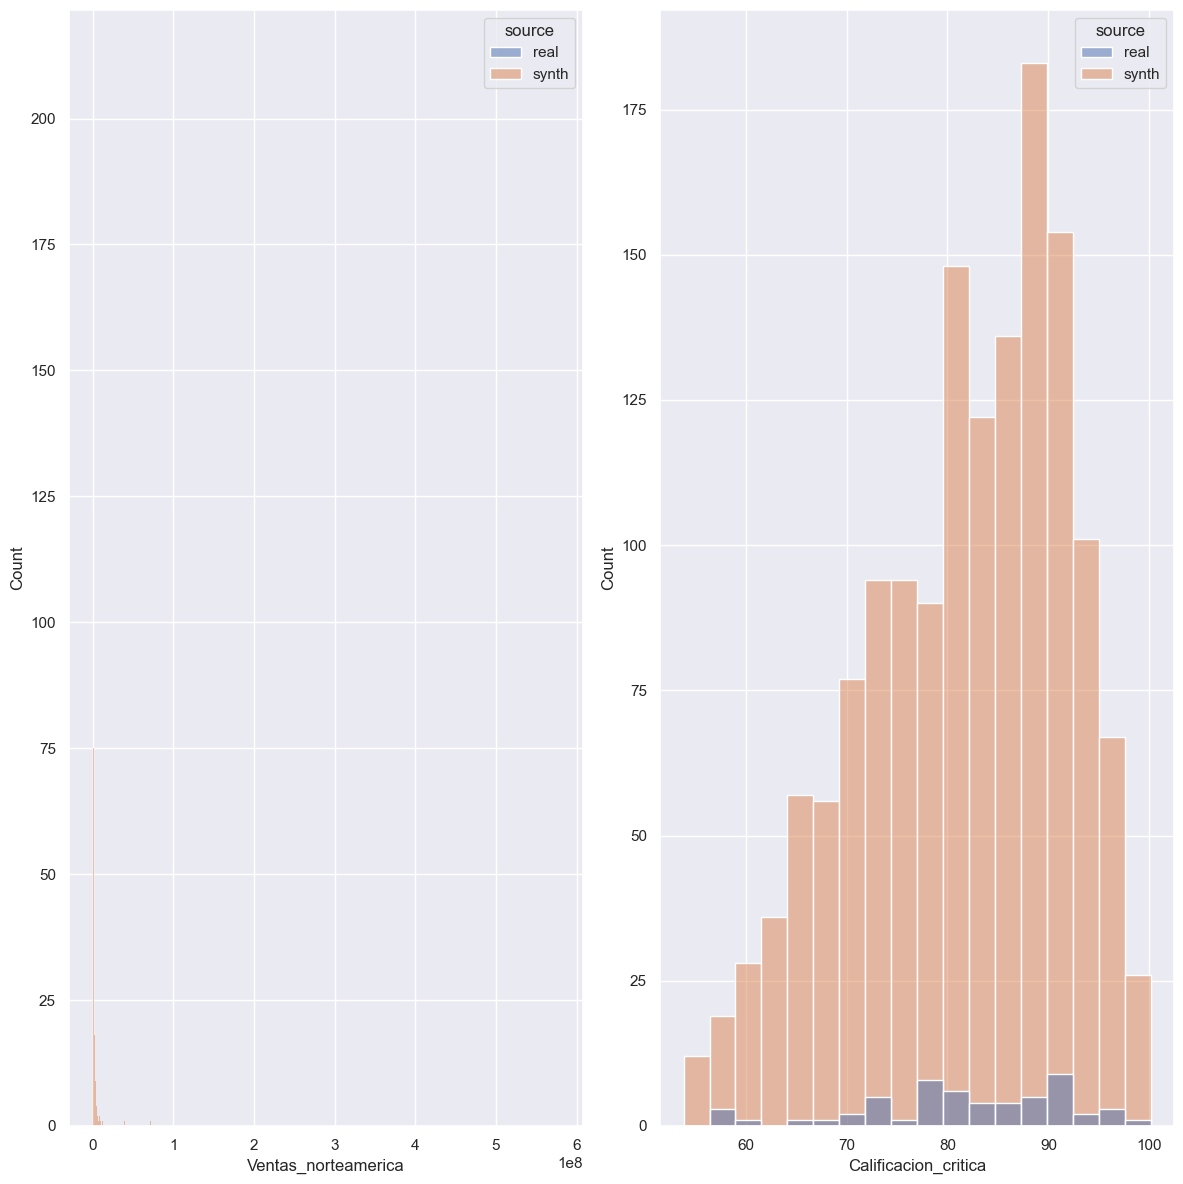

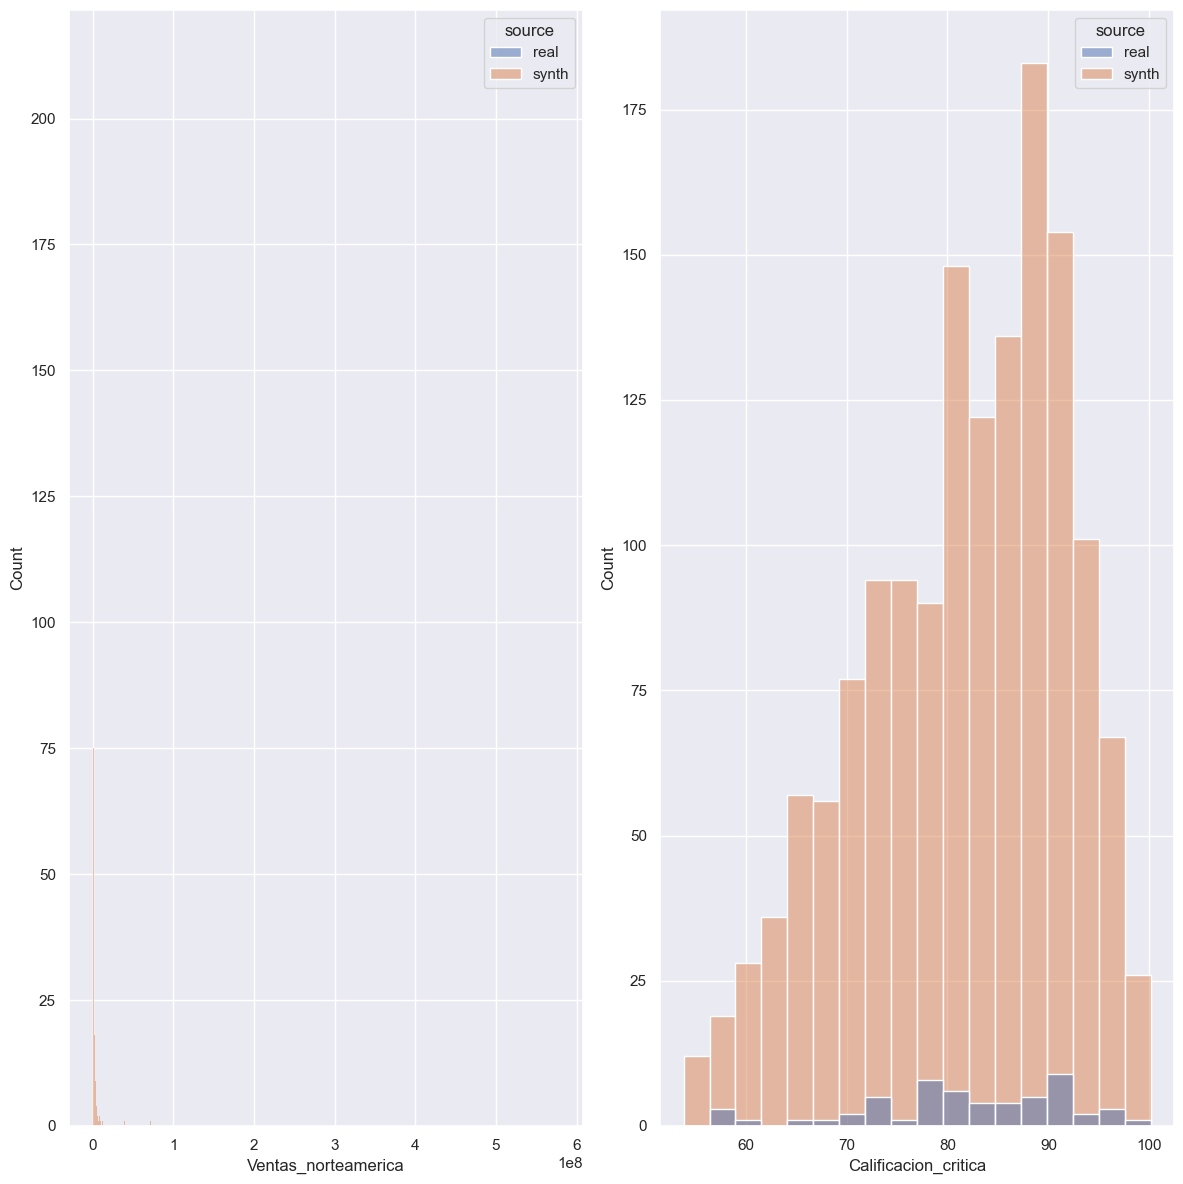

In [106]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [107]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,9.436677e-01
wass-Ventas_norteamerica,1.785614e+06
kolmogorov-Calificacion_critica-statistic,6.552381e-02
kolmogorov-Calificacion_critica-pvalue,9.623627e-01
kolmogorov-Ventas_norteamerica-statistic,6.661905e-02
kolmogorov-Ventas_norteamerica-pvalue,9.568055e-01
propensity_metrics-pmse,3.469446e-02
propensity_metrics-pmse_standardised,1.154701e+00
propensity_metrics-pmse_ratio,1.000000e+00
pearson-msd,2.078299e-01


In [108]:
comparison_evaluator = sg.Evaluator(pcreal, pcsyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,308.0,77.792208,10.756212,37.000000,72.000000,79.000000,86.000000,9.600000e+01
Calificacion_critica_synth,1500.0,78.053017,10.831471,27.856814,73.183292,79.784095,85.774478,9.879575e+01
Ventas_norteamerica_real,308.0,216233.766234,481207.869407,10000.000000,20000.000000,50000.000000,150000.000000,4.030000e+06
Ventas_norteamerica_synth,1500.0,111085.298254,706771.477611,4849.528421,16335.024717,28225.661925,58235.467739,1.586180e+07


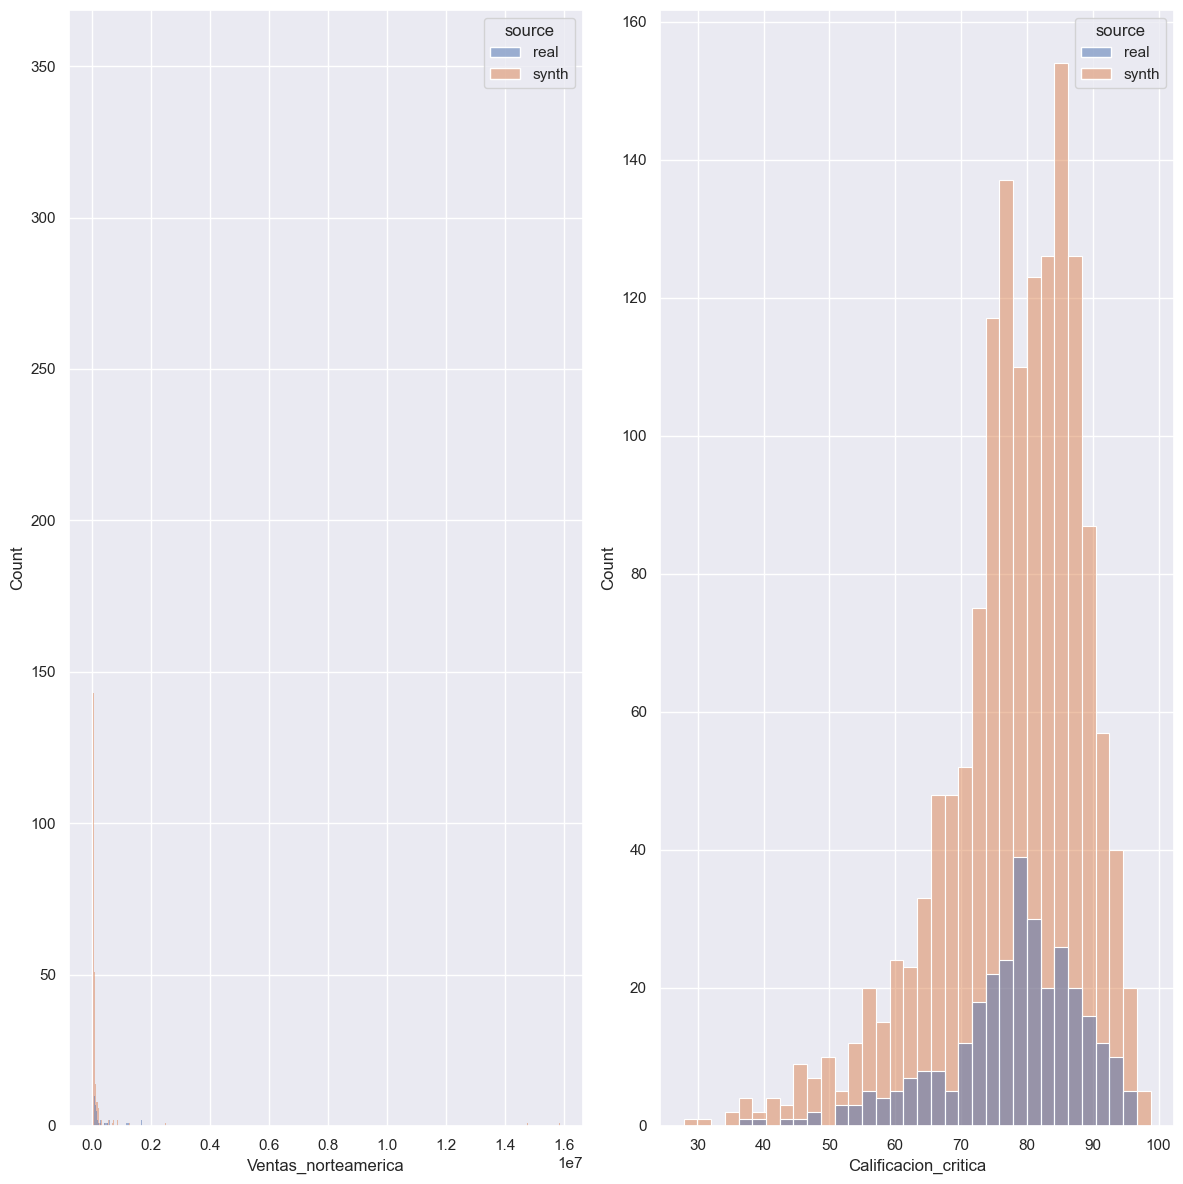

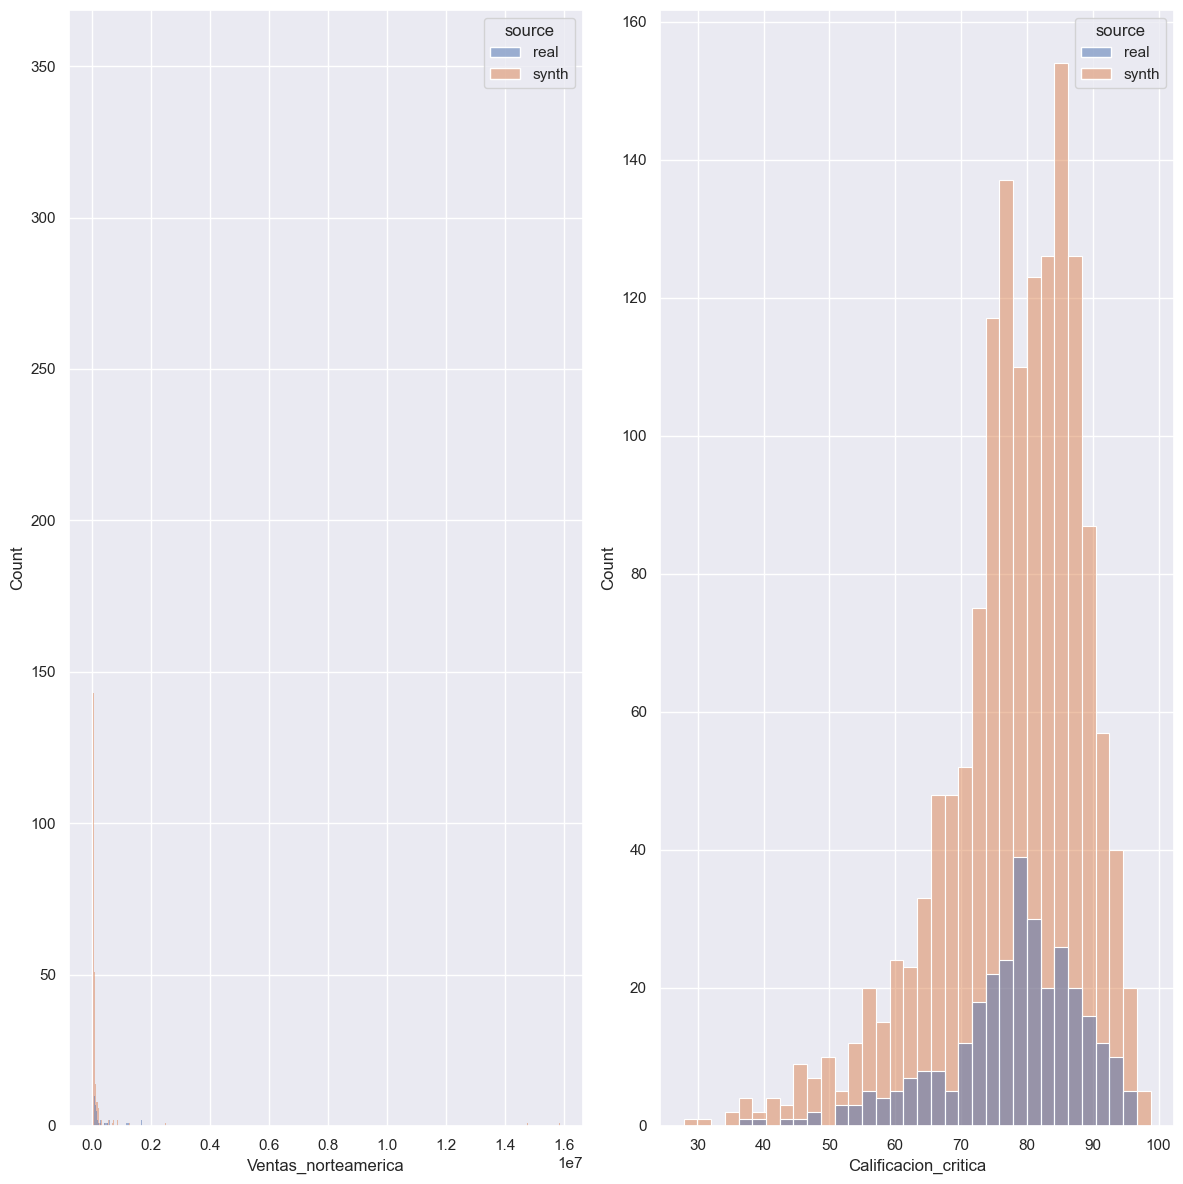

In [111]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [112]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,5.506958e-01
wass-Ventas_norteamerica,1.540131e+05
kolmogorov-Calificacion_critica-statistic,6.077056e-02
kolmogorov-Calificacion_critica-pvalue,2.883639e-01
kolmogorov-Ventas_norteamerica-statistic,2.318442e-01
kolmogorov-Ventas_norteamerica-pvalue,1.508491e-12
propensity_metrics-pmse,1.366045e-01
propensity_metrics-pmse_standardised,5.349589e-01
propensity_metrics-pmse_ratio,1.004096e+00
pearson-msd,4.809089e-02


In [113]:
comparison_evaluator = sg.Evaluator(ps2real, ps2syn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,1280.0,68.769531,1.307245e+01,24.000000,60.000000,70.000000,78.000000,9.700000e+01
Calificacion_critica_synth,1500.0,68.804243,1.313790e+01,23.658594,60.062335,68.862294,77.547649,1.152332e+02
Ventas_norteamerica_real,1280.0,388539.062500,7.020868e+05,10000.000000,60000.000000,140000.000000,410000.000000,9.430000e+06
Ventas_norteamerica_synth,1500.0,576769.452462,2.975416e+06,10022.181853,66677.518712,154142.178391,401869.077170,7.050316e+07


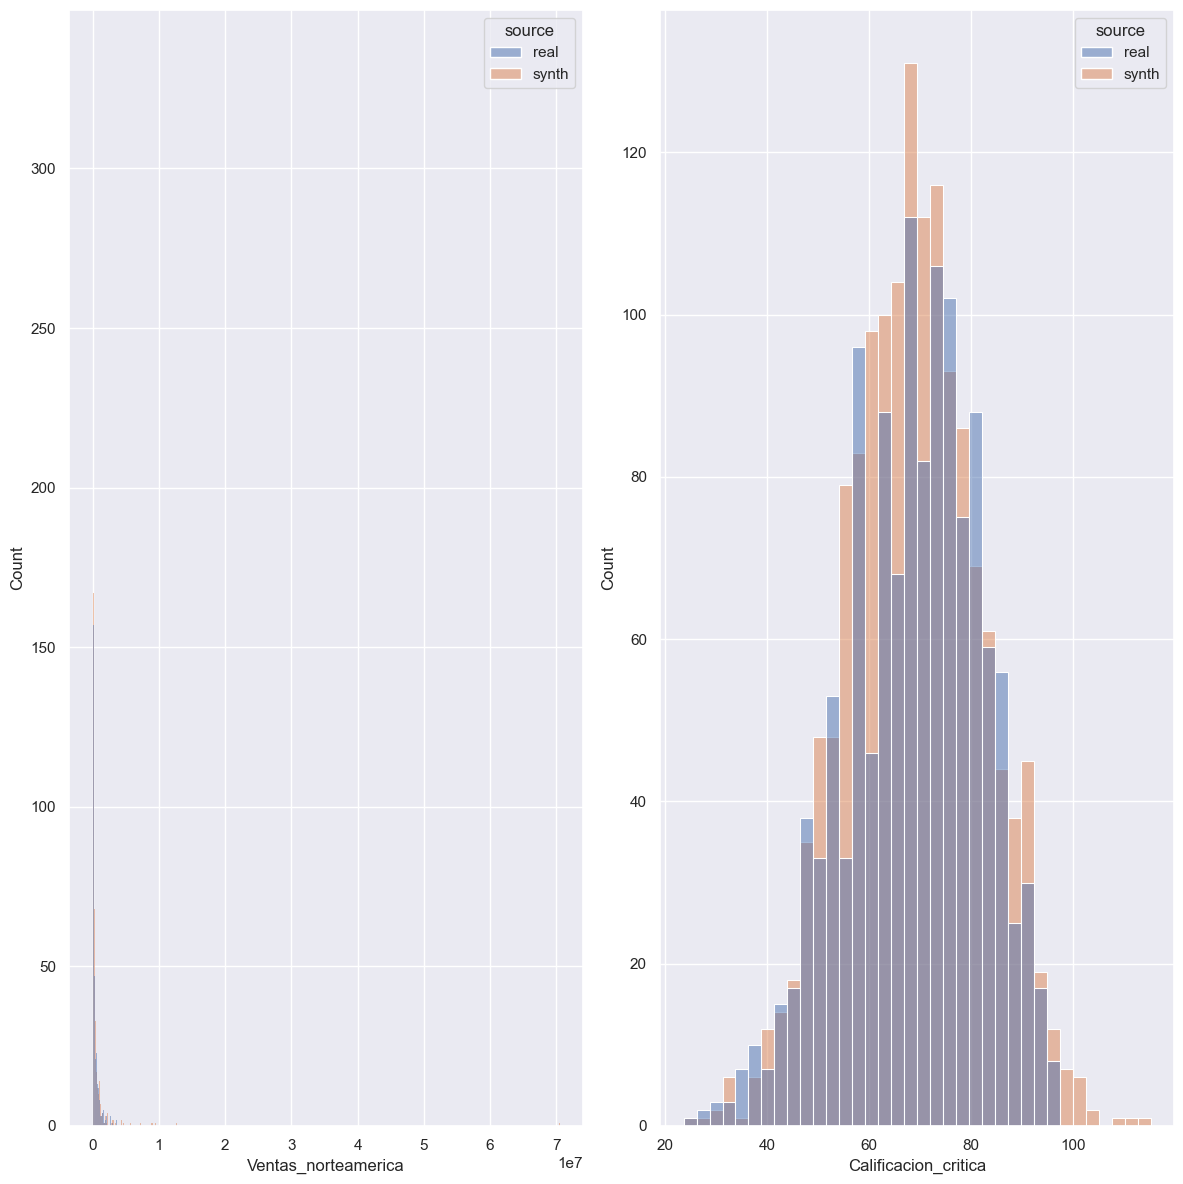

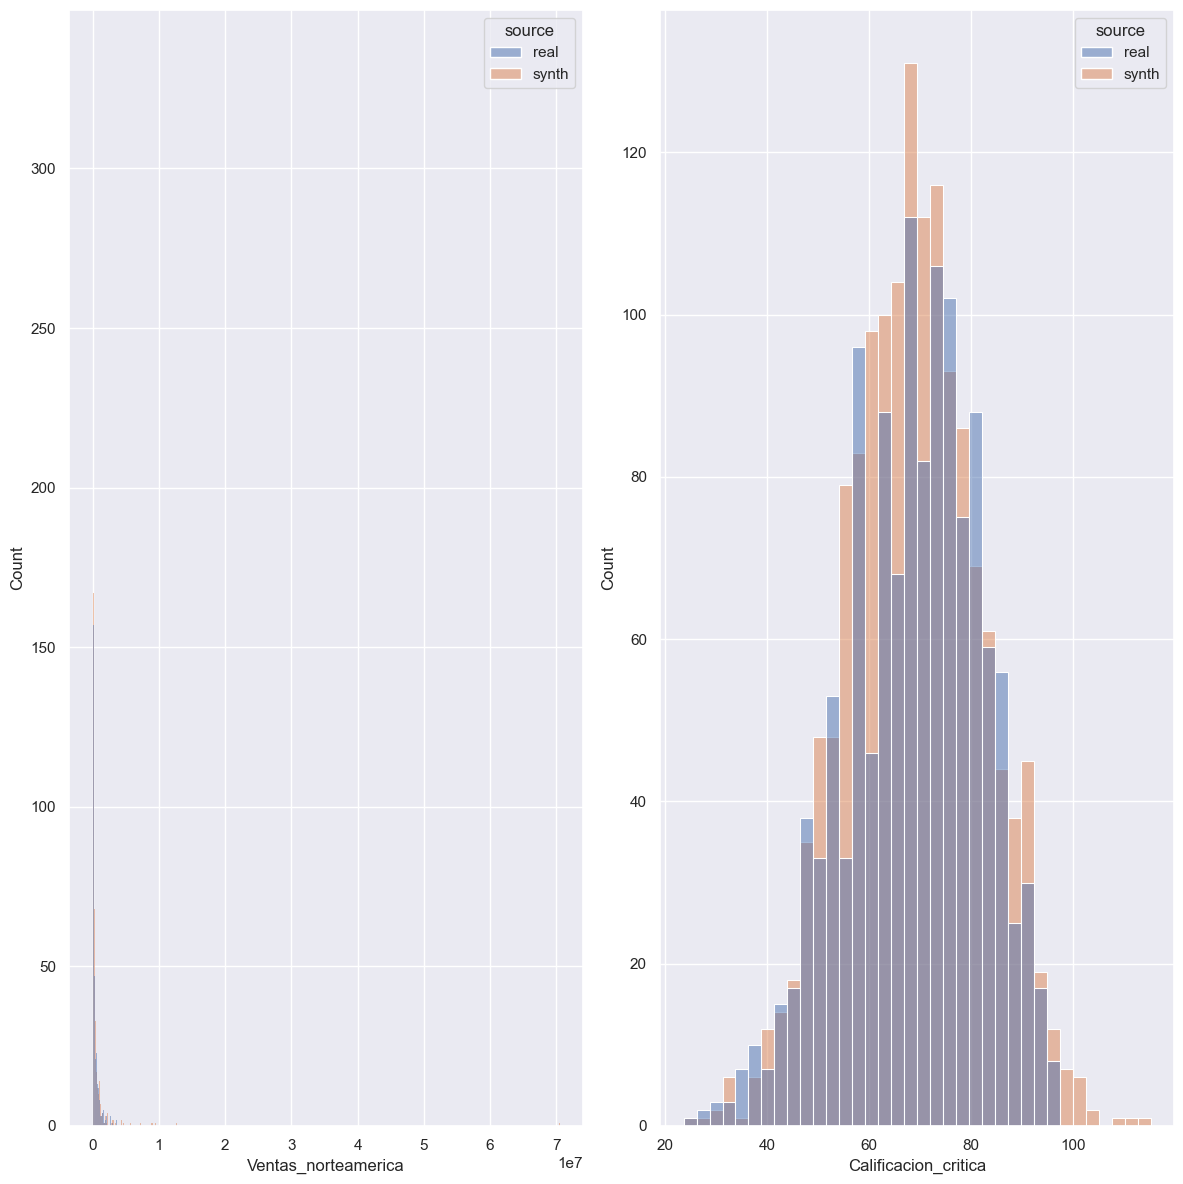

In [114]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [115]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,0.994025
wass-Ventas_norteamerica,199025.624234
kolmogorov-Calificacion_critica-statistic,0.053531
kolmogorov-Calificacion_critica-pvalue,0.036439
kolmogorov-Ventas_norteamerica-statistic,0.033823
kolmogorov-Ventas_norteamerica-pvalue,0.396839
propensity_metrics-pmse,0.221799
propensity_metrics-pmse_standardised,0.171209
propensity_metrics-pmse_ratio,1.001030
pearson-msd,0.179641


In [117]:
comparison_evaluator = sg.Evaluator(ps3real, ps3syn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,784.0,70.545918,14.094932,13.000000,61.000000,73.000000,81.000000,9.800000e+01
Calificacion_critica_synth,1500.0,69.927530,14.920343,-35.066972,61.974041,72.461950,80.138445,1.007898e+02
Ventas_norteamerica_real,784.0,443788.265306,699214.710812,10000.000000,110000.000000,220000.000000,460000.000000,7.020000e+06
Ventas_norteamerica_synth,1500.0,467436.497984,779264.769264,10071.441723,99083.242698,240429.078035,520517.219865,1.179347e+07


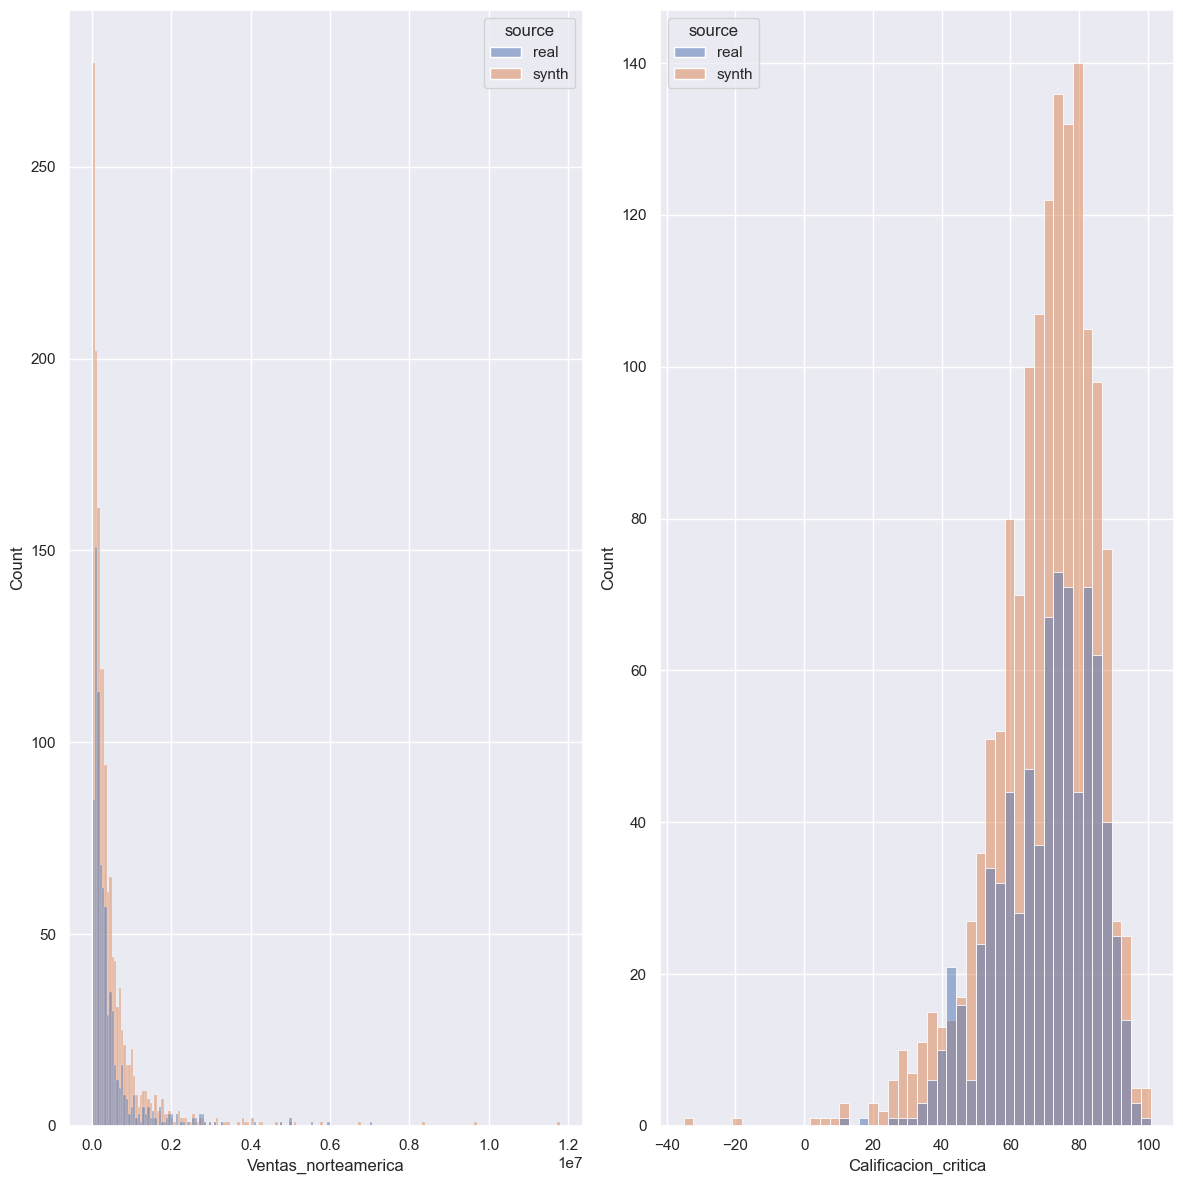

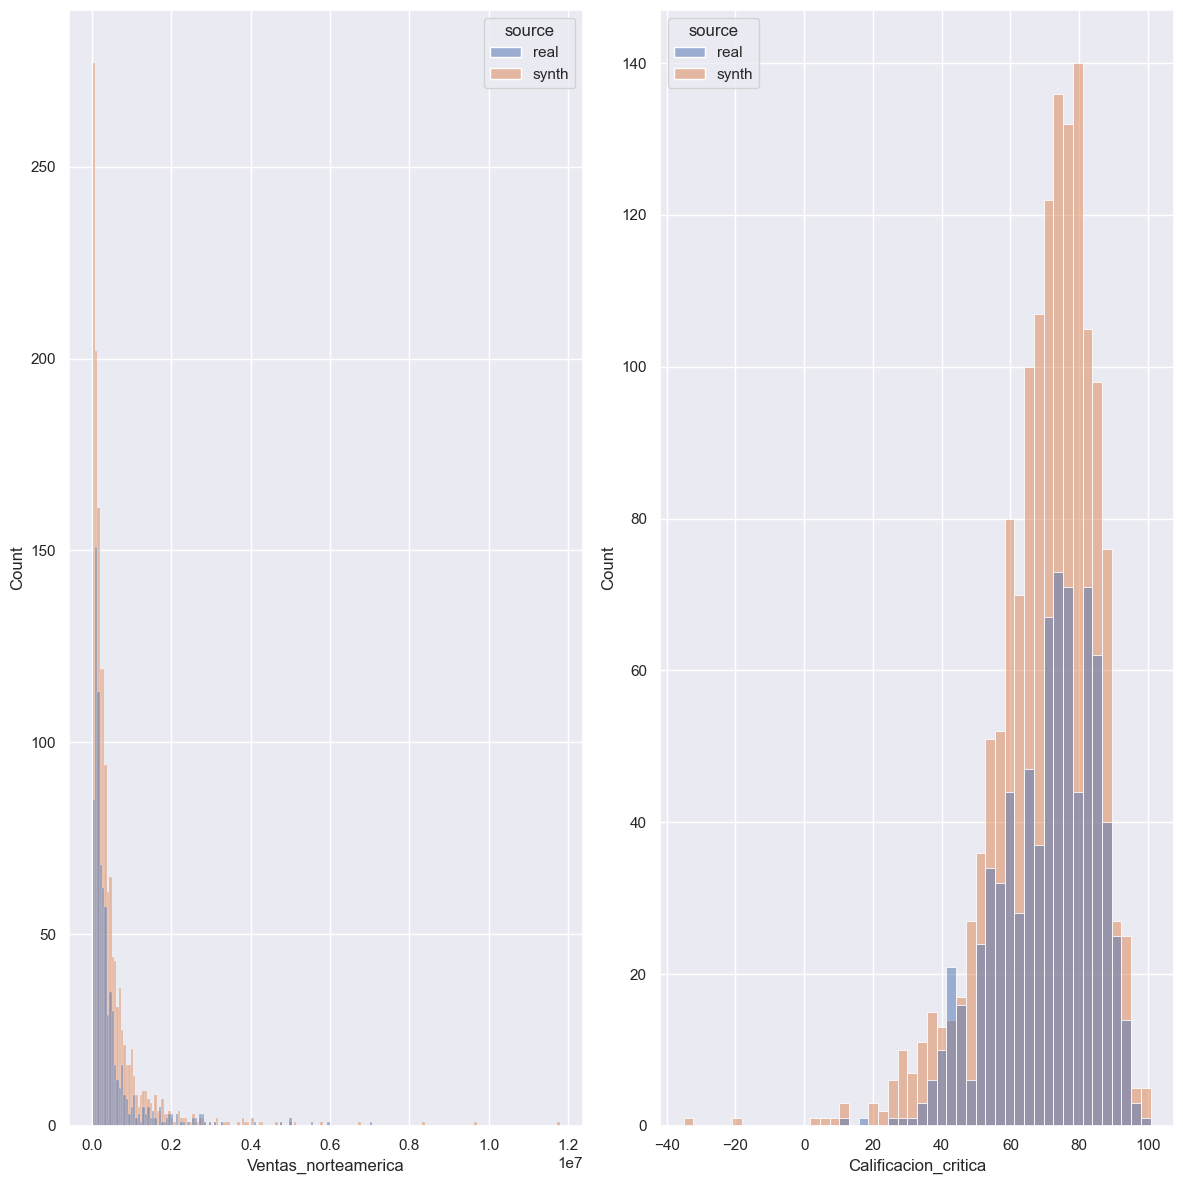

In [118]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [119]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,1.124031
wass-Ventas_norteamerica,45401.622361
kolmogorov-Calificacion_critica-statistic,0.057282
kolmogorov-Calificacion_critica-pvalue,0.064894
kolmogorov-Ventas_norteamerica-statistic,0.076248
kolmogorov-Ventas_norteamerica-pvalue,0.004692
propensity_metrics-pmse,0.215362
propensity_metrics-pmse_standardised,0.964706
propensity_metrics-pmse_ratio,1.005596
pearson-msd,0.219710


In [120]:
comparison_evaluator = sg.Evaluator(ps4real, ps4syn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,213.0,73.389671,11.836276,19.000000,68.000000,75.000000,81.000000,9.700000e+01
Calificacion_critica_synth,1500.0,75.697652,10.975034,14.704815,69.233552,75.871937,81.699668,1.253414e+02
Ventas_norteamerica_real,213.0,396713.615023,593912.116023,10000.000000,40000.000000,140000.000000,470000.000000,3.960000e+06
Ventas_norteamerica_synth,1500.0,427690.717069,780354.041621,6503.457110,35289.952644,125871.659987,448553.130529,1.186764e+07


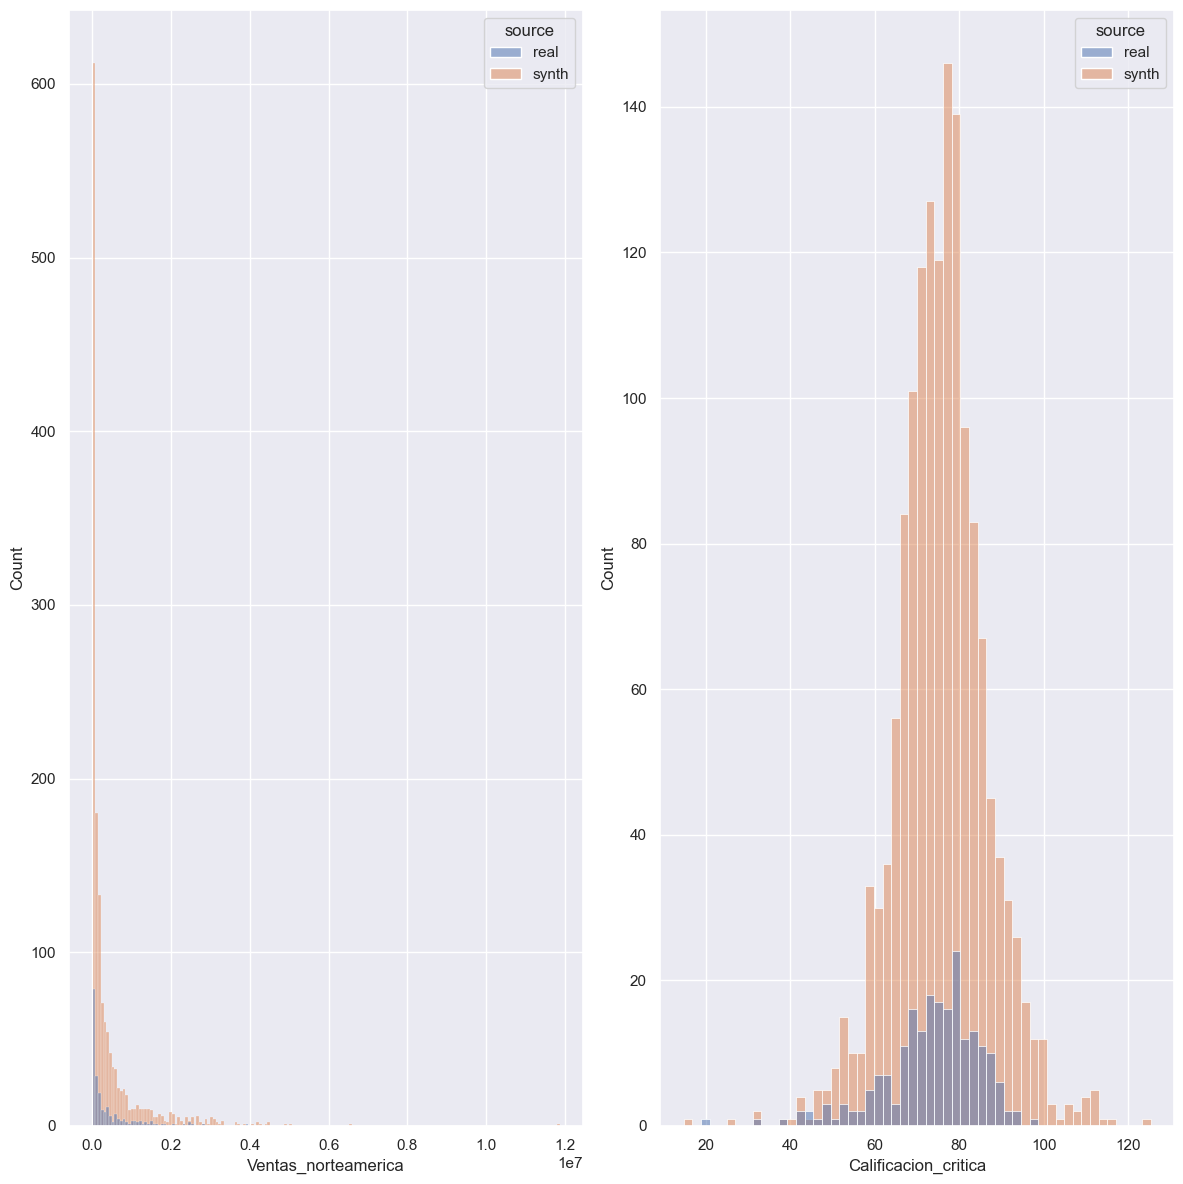

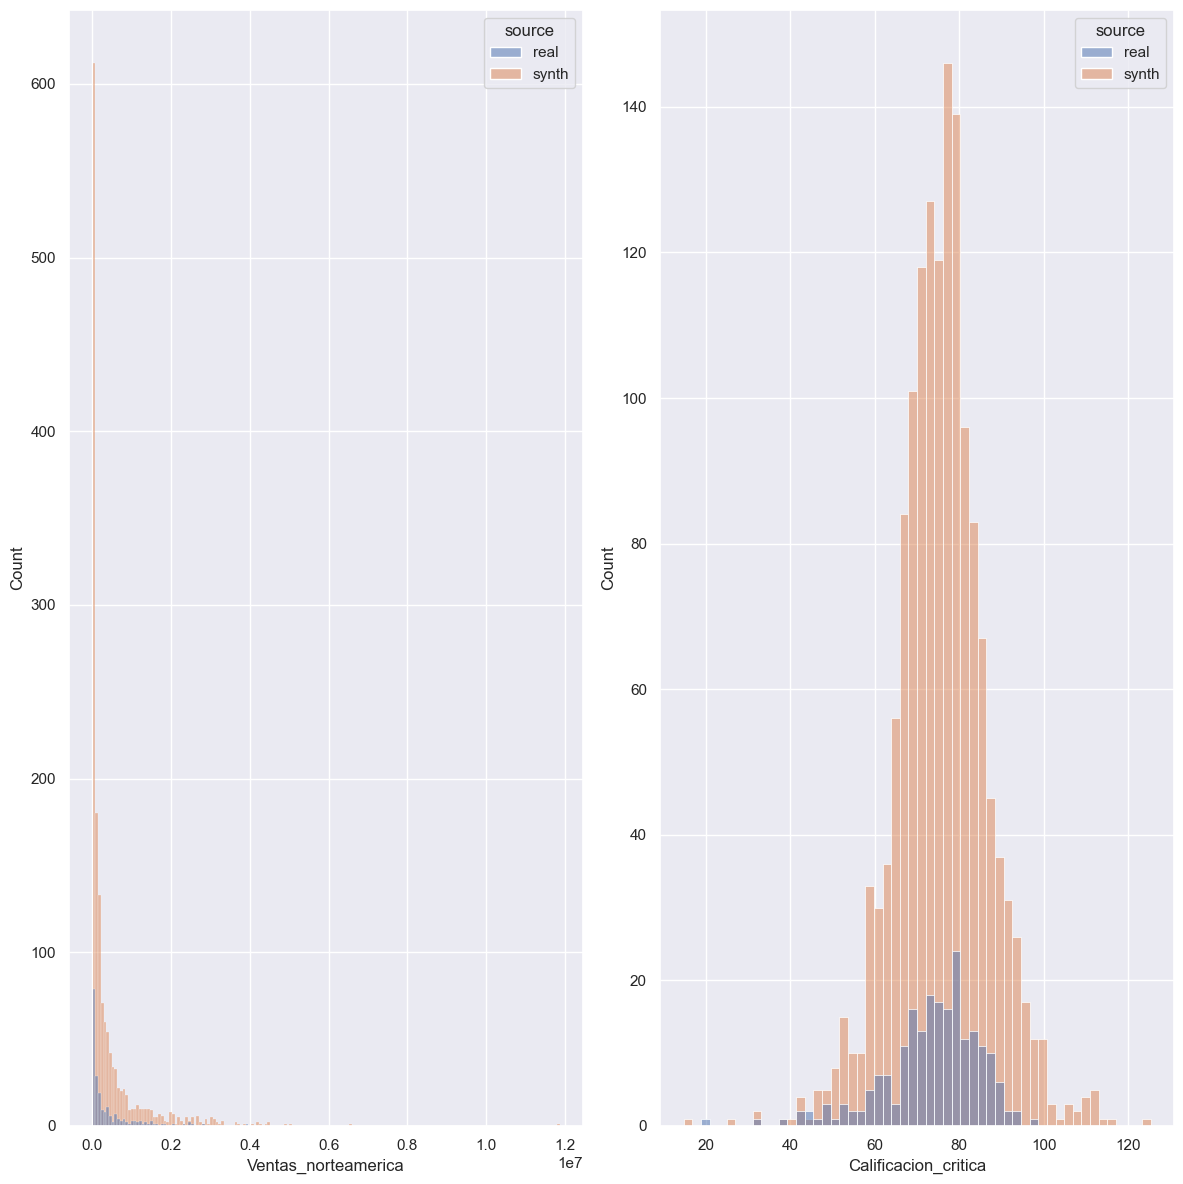

In [121]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [122]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,2.351222
wass-Ventas_norteamerica,64676.036870
kolmogorov-Calificacion_critica-statistic,0.079070
kolmogorov-Calificacion_critica-pvalue,0.182912
kolmogorov-Ventas_norteamerica-statistic,0.071183
kolmogorov-Ventas_norteamerica-pvalue,0.285791
propensity_metrics-pmse,0.107423
propensity_metrics-pmse_standardised,-1.740098
propensity_metrics-pmse_ratio,0.993119
pearson-msd,0.153171


In [123]:
comparison_evaluator = sg.Evaluator(pspreal, pspsyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,447.0,67.357942,1.178210e+01,28.000000,60.000000,68.000000,76.000000,9.100000e+01
Calificacion_critica_synth,1500.0,67.618712,1.178177e+01,11.149474,60.649313,68.763716,76.414062,9.073645e+01
Ventas_norteamerica_real,447.0,198814.317673,2.864921e+05,10000.000000,60000.000000,110000.000000,220000.000000,2.900000e+06
Ventas_norteamerica_synth,1500.0,362658.453825,2.414968e+06,405.854279,58511.451966,115746.180237,219071.475383,7.734040e+07


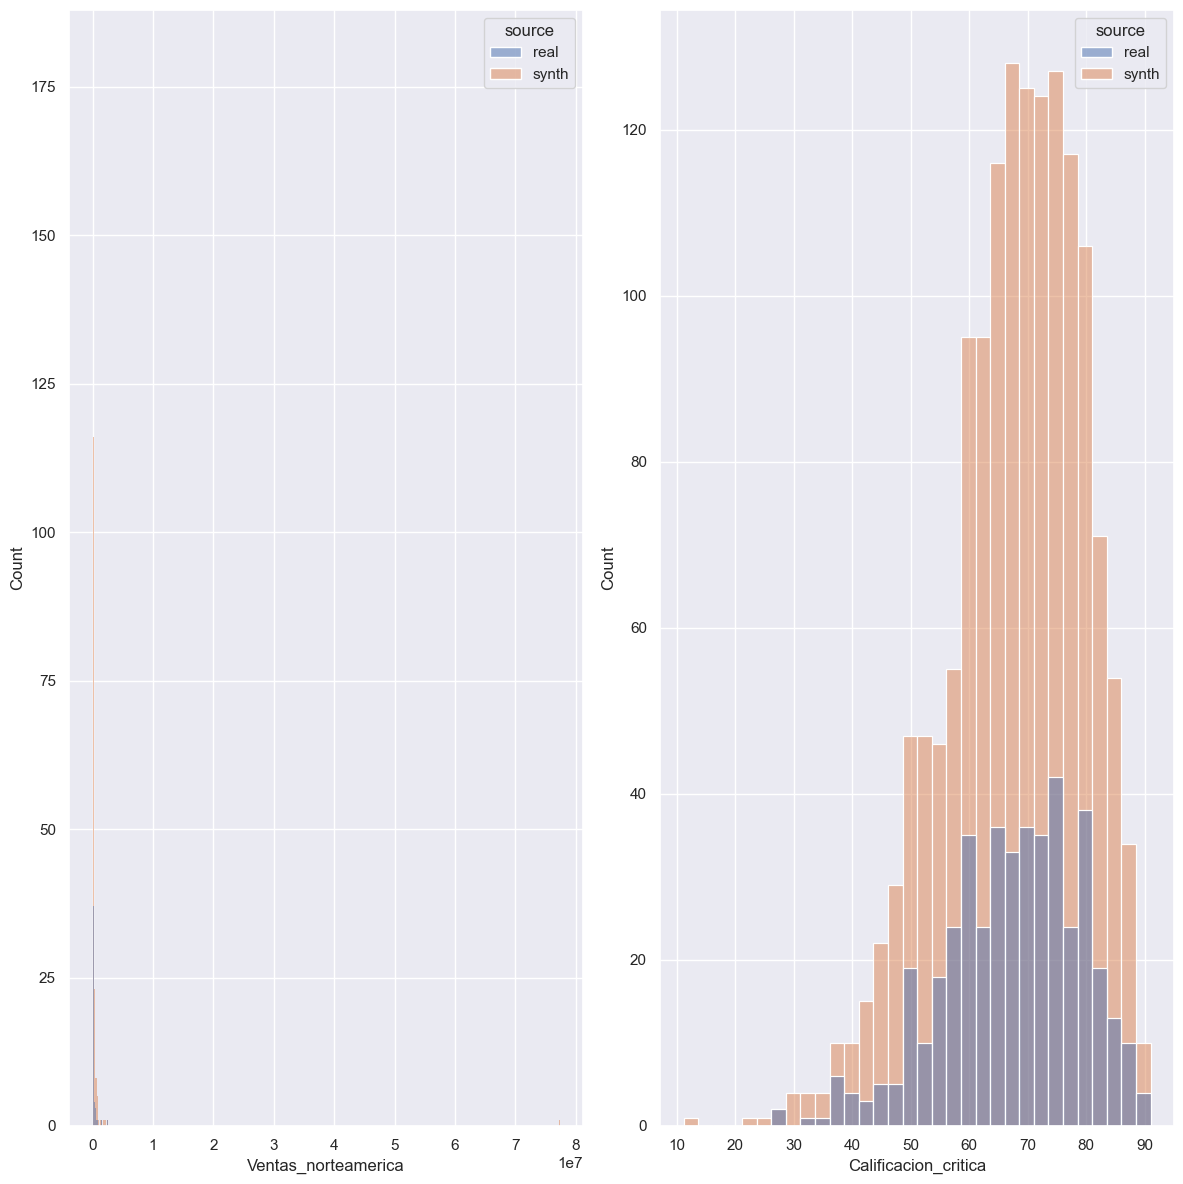

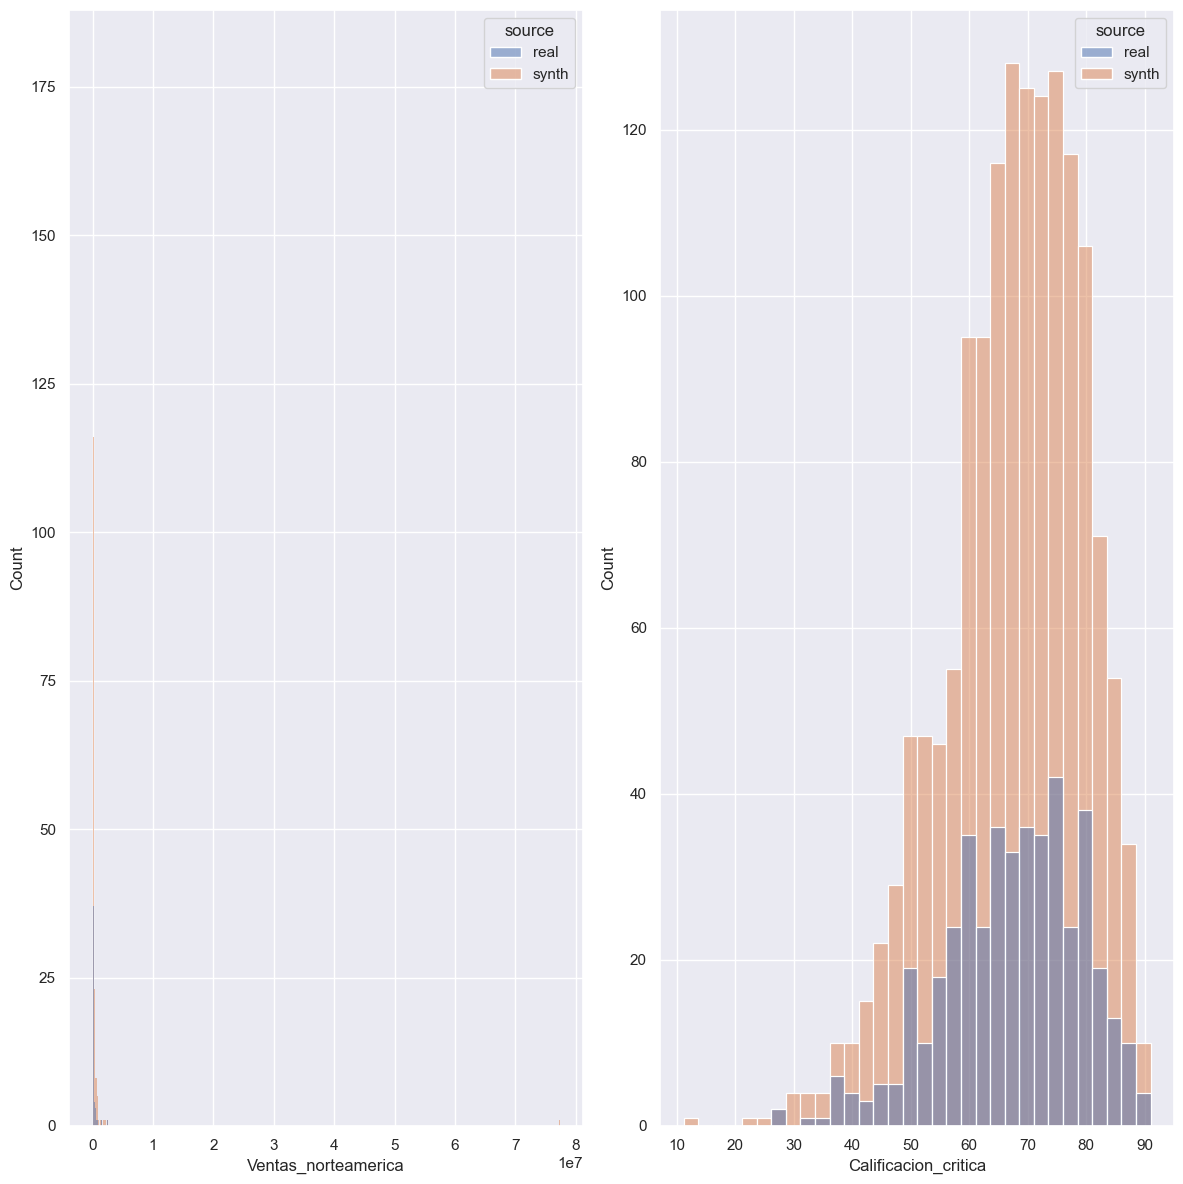

In [124]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [125]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,0.561379
wass-Ventas_norteamerica,167309.778436
kolmogorov-Calificacion_critica-statistic,0.055928
kolmogorov-Calificacion_critica-pvalue,0.221589
kolmogorov-Ventas_norteamerica-statistic,0.058886
kolmogorov-Ventas_norteamerica-pvalue,0.175066
propensity_metrics-pmse,0.171525
propensity_metrics-pmse_standardised,0.425115
propensity_metrics-pmse_ratio,1.001875
pearson-msd,0.094951


In [126]:
comparison_evaluator = sg.Evaluator(psreal, pssyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,198.0,71.414141,1.671682e+01,26.000000,62.000000,73.500000,85.000000,9.800000e+01
Calificacion_critica_synth,1500.0,70.734266,1.619421e+01,16.783872,60.885283,73.146106,83.194739,9.817372e+01
Ventas_norteamerica_real,198.0,530707.070707,8.293986e+05,10000.000000,80000.000000,190000.000000,517500.000000,4.020000e+06
Ventas_norteamerica_synth,1500.0,541224.594273,1.057097e+06,4025.240238,72761.149512,185072.030636,508127.020807,1.416701e+07


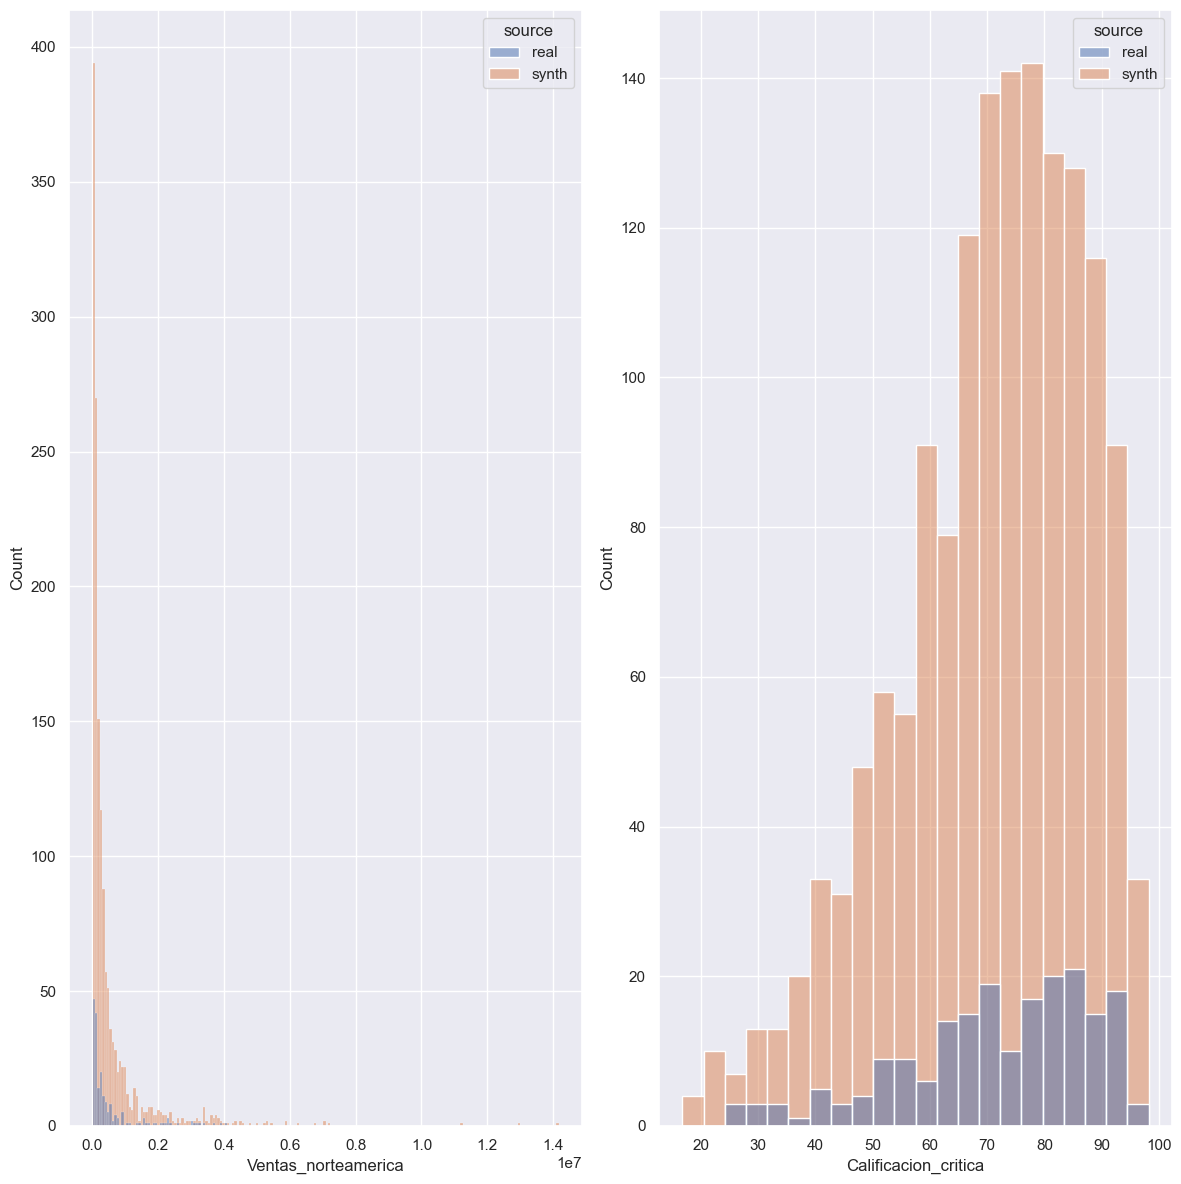

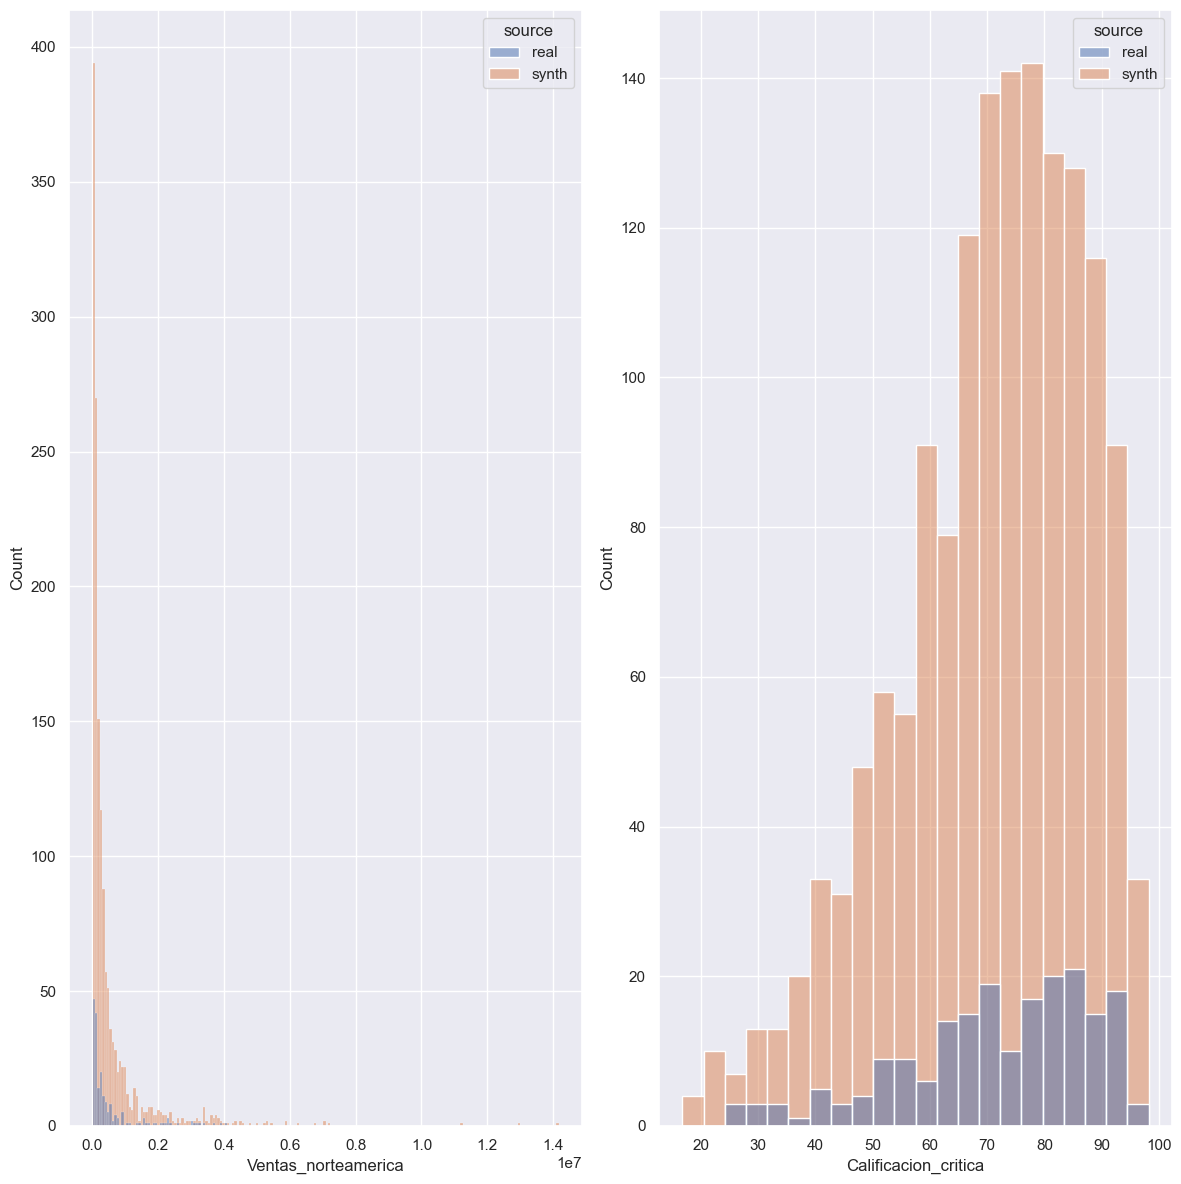

In [127]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [128]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,1.136816
wass-Ventas_norteamerica,85928.609198
kolmogorov-Calificacion_critica-statistic,0.074687
kolmogorov-Calificacion_critica-pvalue,0.268467
kolmogorov-Ventas_norteamerica-statistic,0.044364
kolmogorov-Ventas_norteamerica-pvalue,0.864291
propensity_metrics-pmse,0.102716
propensity_metrics-pmse_standardised,-1.000000
propensity_metrics-pmse_ratio,0.998569
pearson-msd,0.200857


In [129]:
comparison_evaluator = sg.Evaluator(psvreal, psvsyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,90.0,70.677778,11.631831,33.000000,63.250000,71.000000,79.000000,9.300000e+01
Calificacion_critica_synth,1500.0,72.954542,11.713826,15.600192,65.604973,72.653657,80.384286,1.246940e+02
Ventas_norteamerica_real,90.0,111666.666667,124334.181801,10000.000000,30000.000000,80000.000000,150000.000000,7.100000e+05
Ventas_norteamerica_synth,1500.0,104029.734135,115525.817225,5071.705442,30127.539796,63042.457968,134771.516656,1.025371e+06


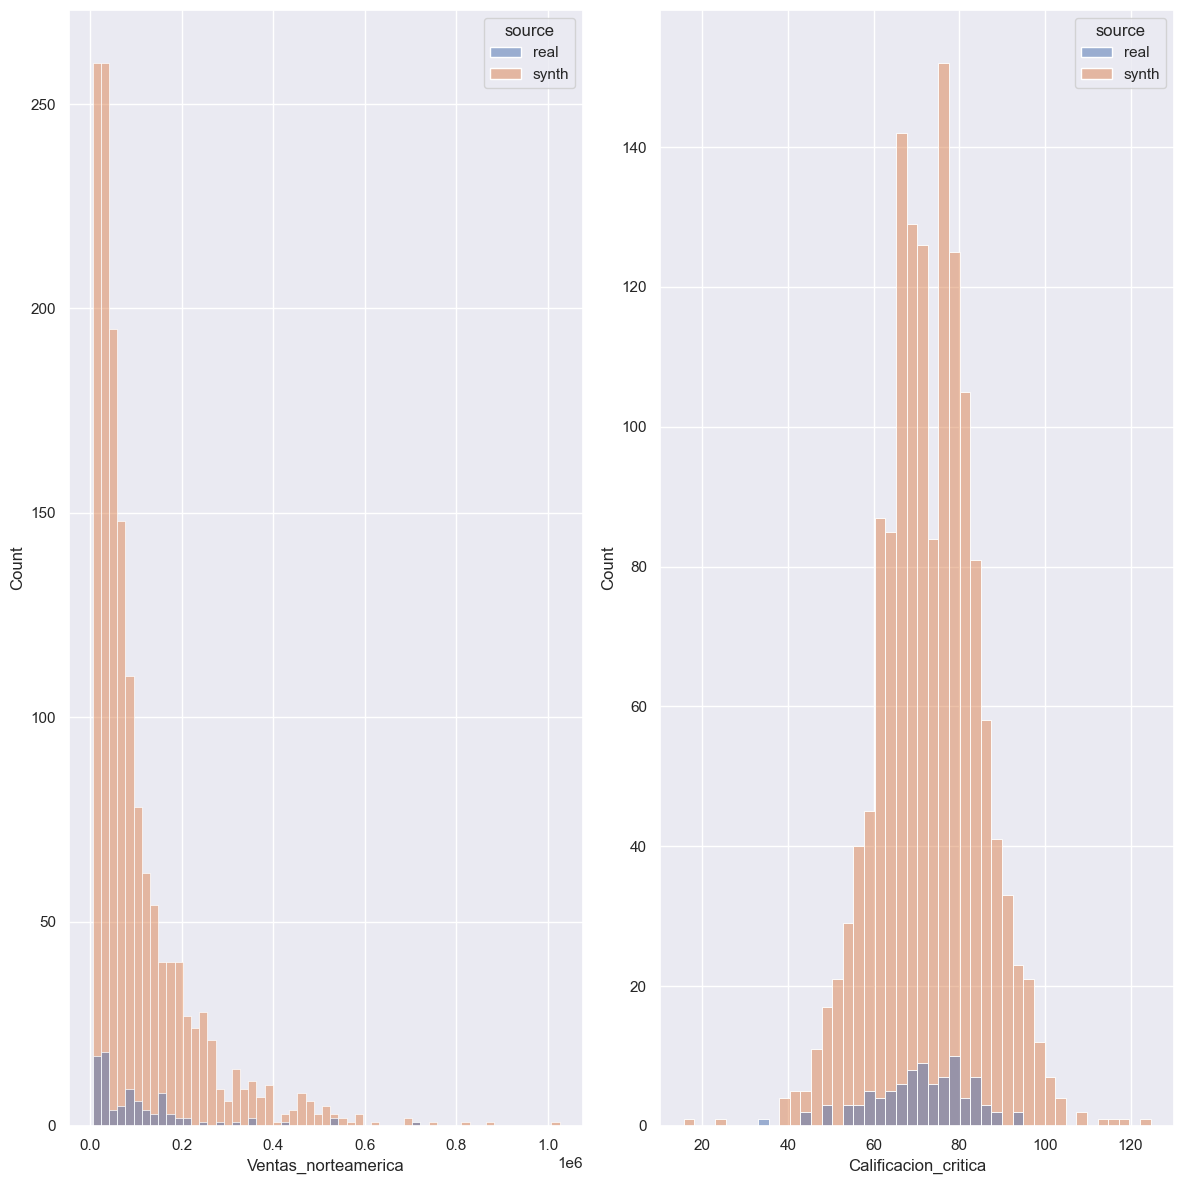

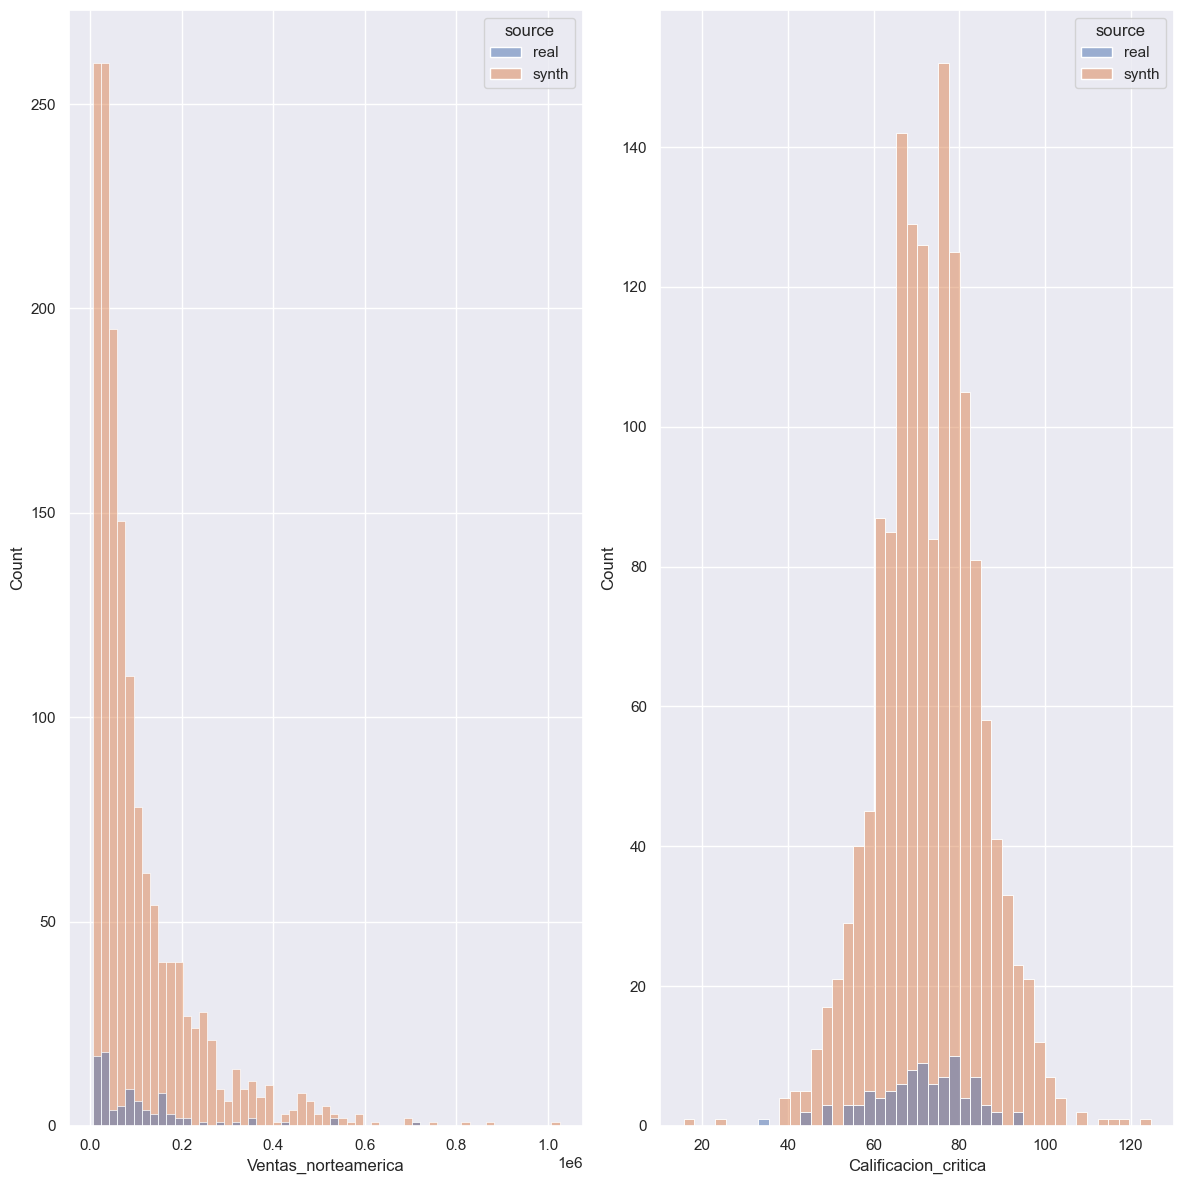

In [130]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [132]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,2.326440
wass-Ventas_norteamerica,12485.001633
kolmogorov-Calificacion_critica-statistic,0.089111
kolmogorov-Calificacion_critica-pvalue,0.482956
kolmogorov-Ventas_norteamerica-statistic,0.099111
kolmogorov-Ventas_norteamerica-pvalue,0.351559
propensity_metrics-pmse,0.053400
propensity_metrics-pmse_standardised,0.672692
propensity_metrics-pmse_ratio,1.002657
pearson-msd,0.000599


In [133]:
comparison_evaluator = sg.Evaluator(wiireal, wiisyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,580.0,62.817241,1.493016e+01,19.000000,53.000000,65.000000,74.000000,9.700000e+01
Calificacion_critica_synth,1500.0,62.874022,1.674936e+01,-65.799279,53.837622,65.732932,74.735784,9.648688e+01
Ventas_norteamerica_real,580.0,635672.413793,2.254770e+06,10000.000000,100000.000000,215000.000000,460000.000000,4.136000e+07
Ventas_norteamerica_synth,1500.0,833014.797152,1.124901e+07,10415.348188,88601.909559,229212.512567,516672.119261,4.313786e+08


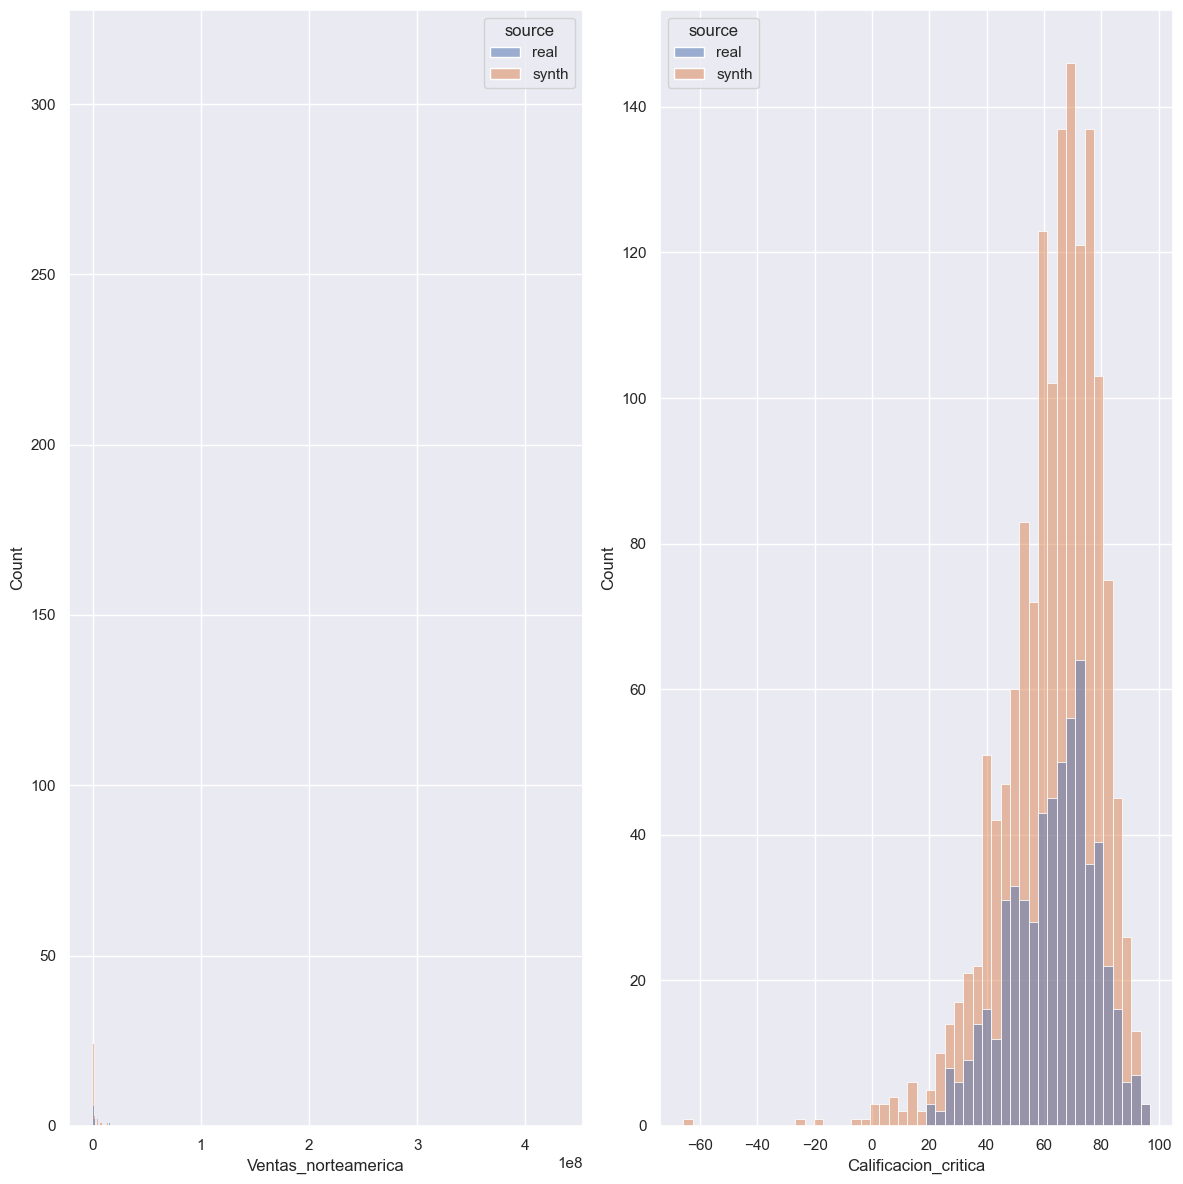

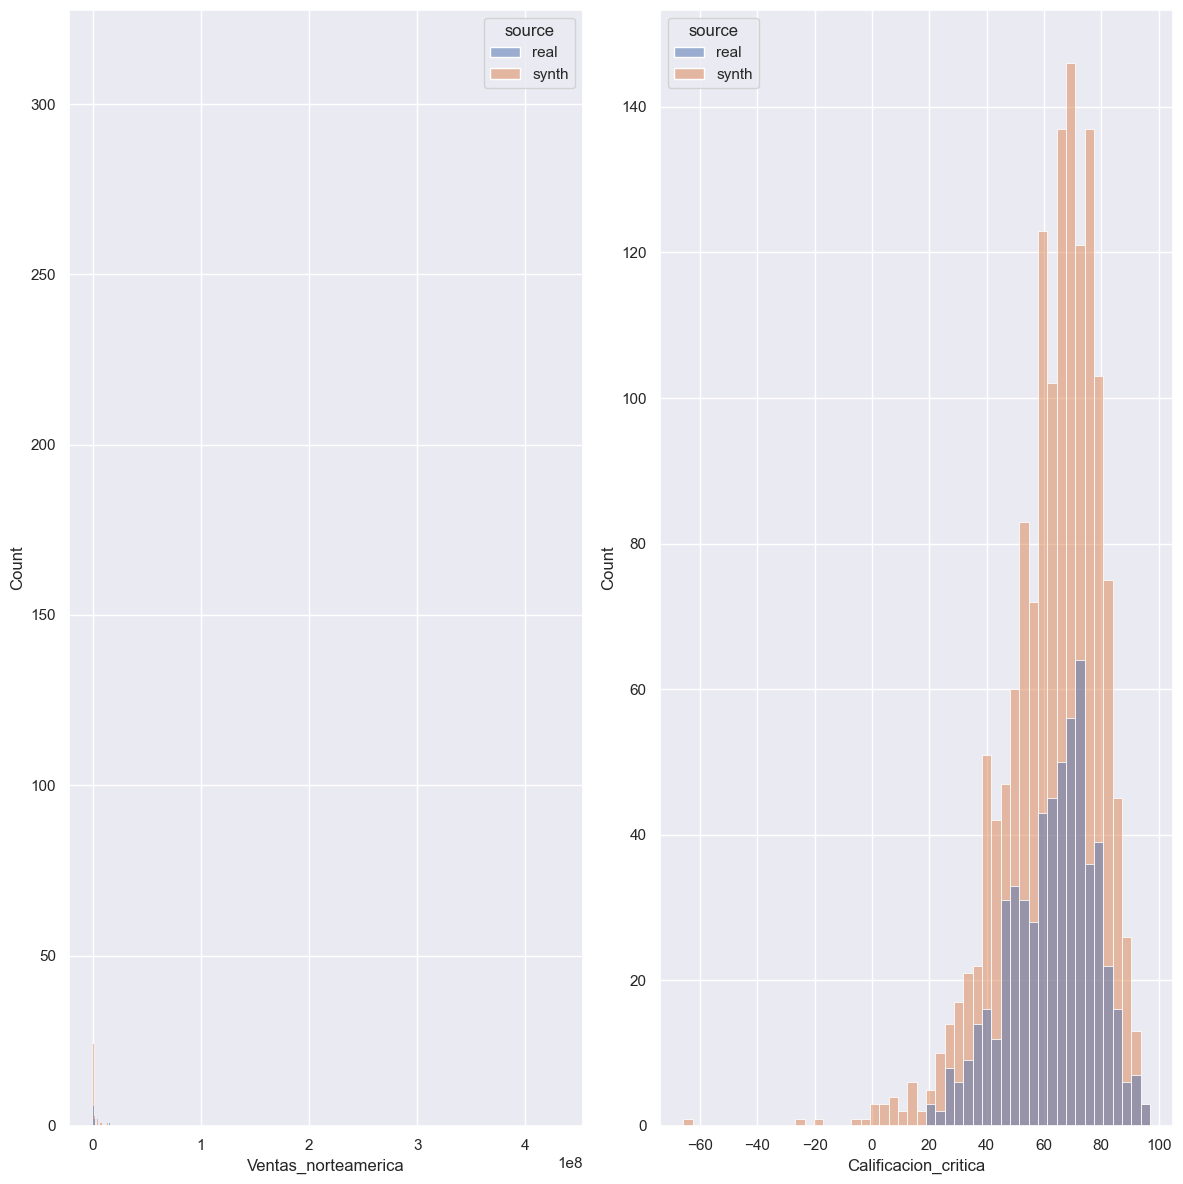

In [134]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [135]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,1.408891
wass-Ventas_norteamerica,369536.278794
kolmogorov-Calificacion_critica-statistic,0.050253
kolmogorov-Calificacion_critica-pvalue,0.232017
kolmogorov-Ventas_norteamerica-statistic,0.086046
kolmogorov-Ventas_norteamerica-pvalue,0.003795
propensity_metrics-pmse,0.197365
propensity_metrics-pmse_standardised,1.734771
propensity_metrics-pmse_ratio,1.007629
pearson-msd,0.019081


In [136]:
comparison_evaluator = sg.Evaluator(wiiureal, wiiusyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,82.0,71.158537,1.482446e+01,24.000000,65.250000,75.000000,81.750000,9.300000e+01
Calificacion_critica_synth,1500.0,71.454601,1.485461e+01,-35.168607,64.972748,74.487167,81.828831,9.743531e+01
Ventas_norteamerica_real,82.0,375365.853659,5.625234e+05,10000.000000,90000.000000,200000.000000,357500.000000,3.150000e+06
Ventas_norteamerica_synth,1500.0,403805.058500,1.056868e+06,10118.579607,86919.029325,204799.204404,467949.095432,3.567602e+07


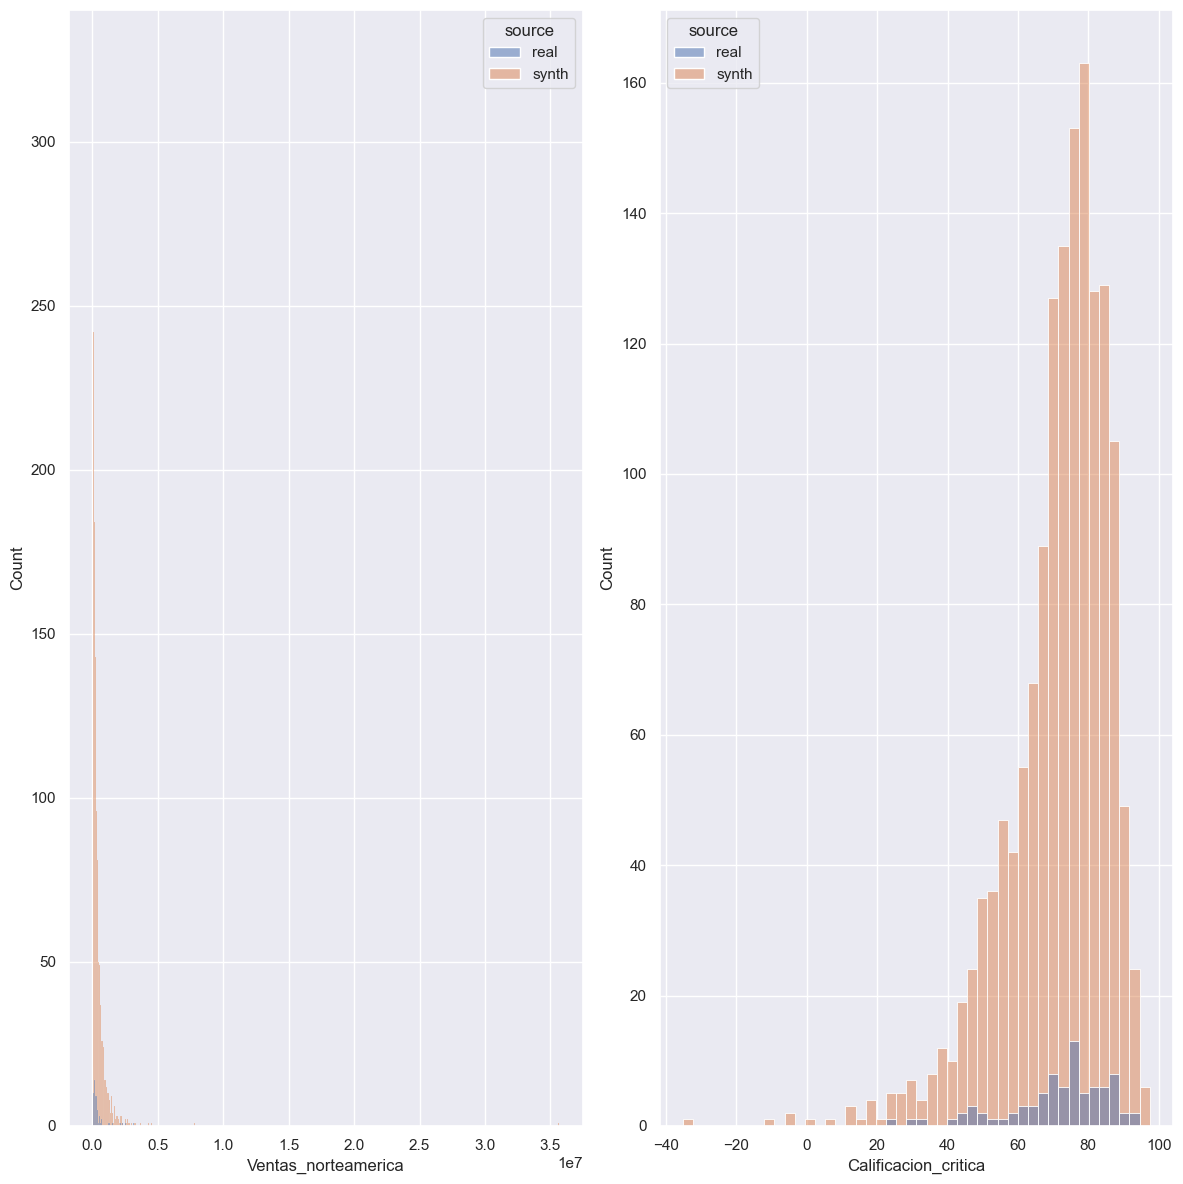

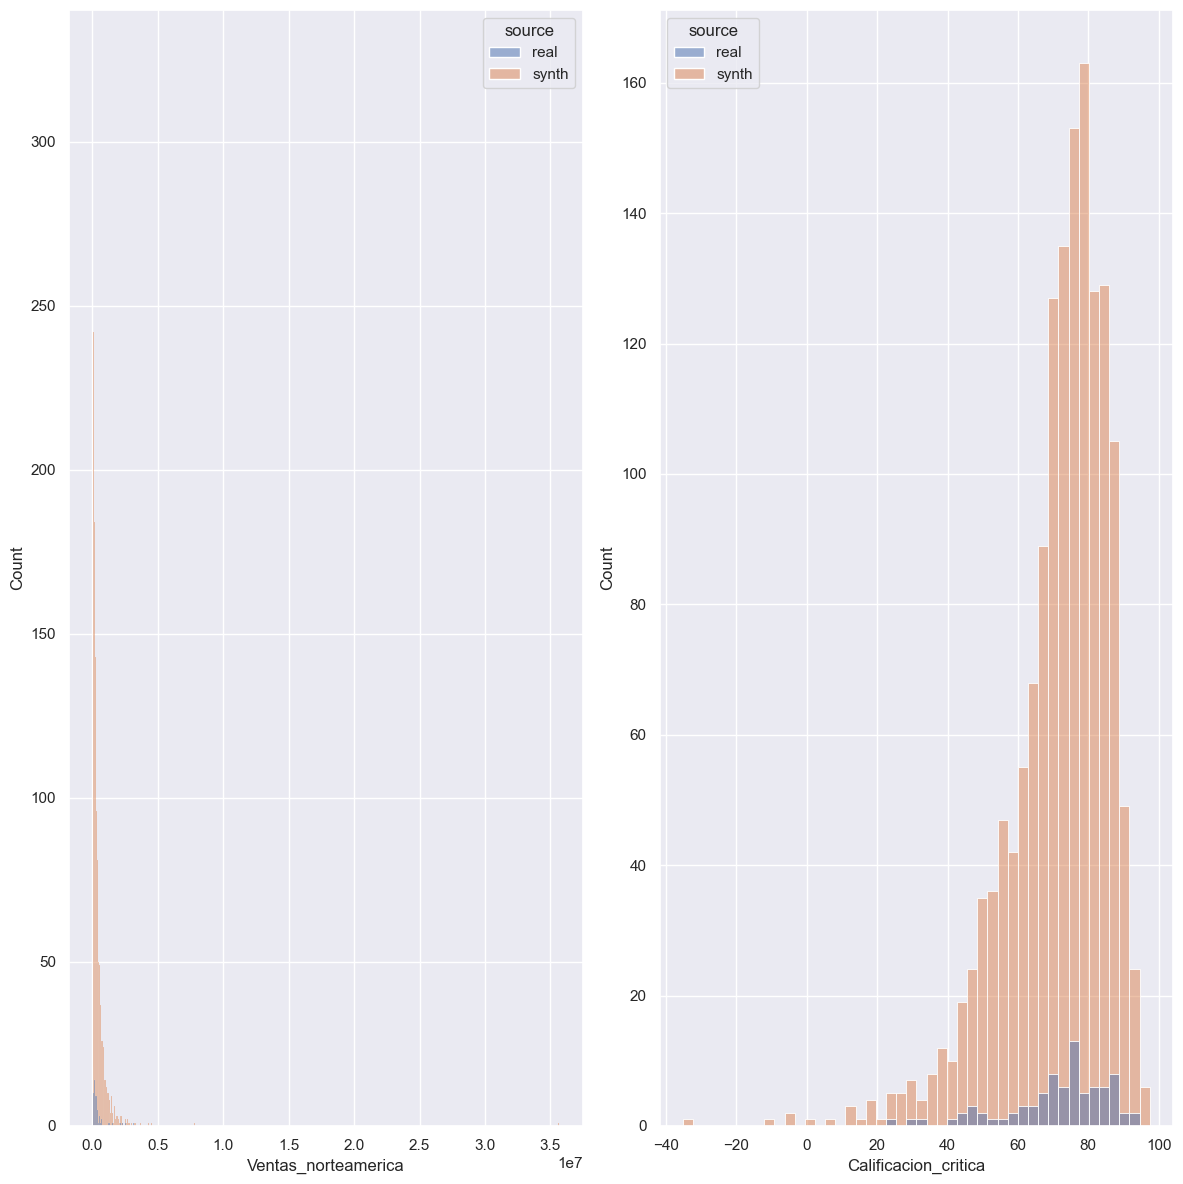

In [137]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [138]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,1.058737
wass-Ventas_norteamerica,97713.093165
kolmogorov-Calificacion_critica-statistic,0.062341
kolmogorov-Calificacion_critica-pvalue,0.903523
kolmogorov-Ventas_norteamerica-statistic,0.092683
kolmogorov-Ventas_norteamerica-pvalue,0.486412
propensity_metrics-pmse,0.049146
propensity_metrics-pmse_standardised,0.333333
propensity_metrics-pmse_ratio,1.000644
pearson-msd,0.130630


In [139]:
comparison_evaluator = sg.Evaluator(x360real, x360syn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,901.0,68.615982,1.509235e+01,19.000000,59.000000,71.000000,80.000000,9.800000e+01
Calificacion_critica_synth,1500.0,69.081776,1.491912e+01,6.881214,60.857936,71.445570,79.609057,9.979284e+01
Ventas_norteamerica_real,901.0,604372.918979,1.174831e+06,10000.000000,110000.000000,240000.000000,580000.000000,1.500000e+07
Ventas_norteamerica_synth,1500.0,551788.397840,1.088289e+06,10206.401759,99106.330224,250858.080945,571948.338466,1.983897e+07


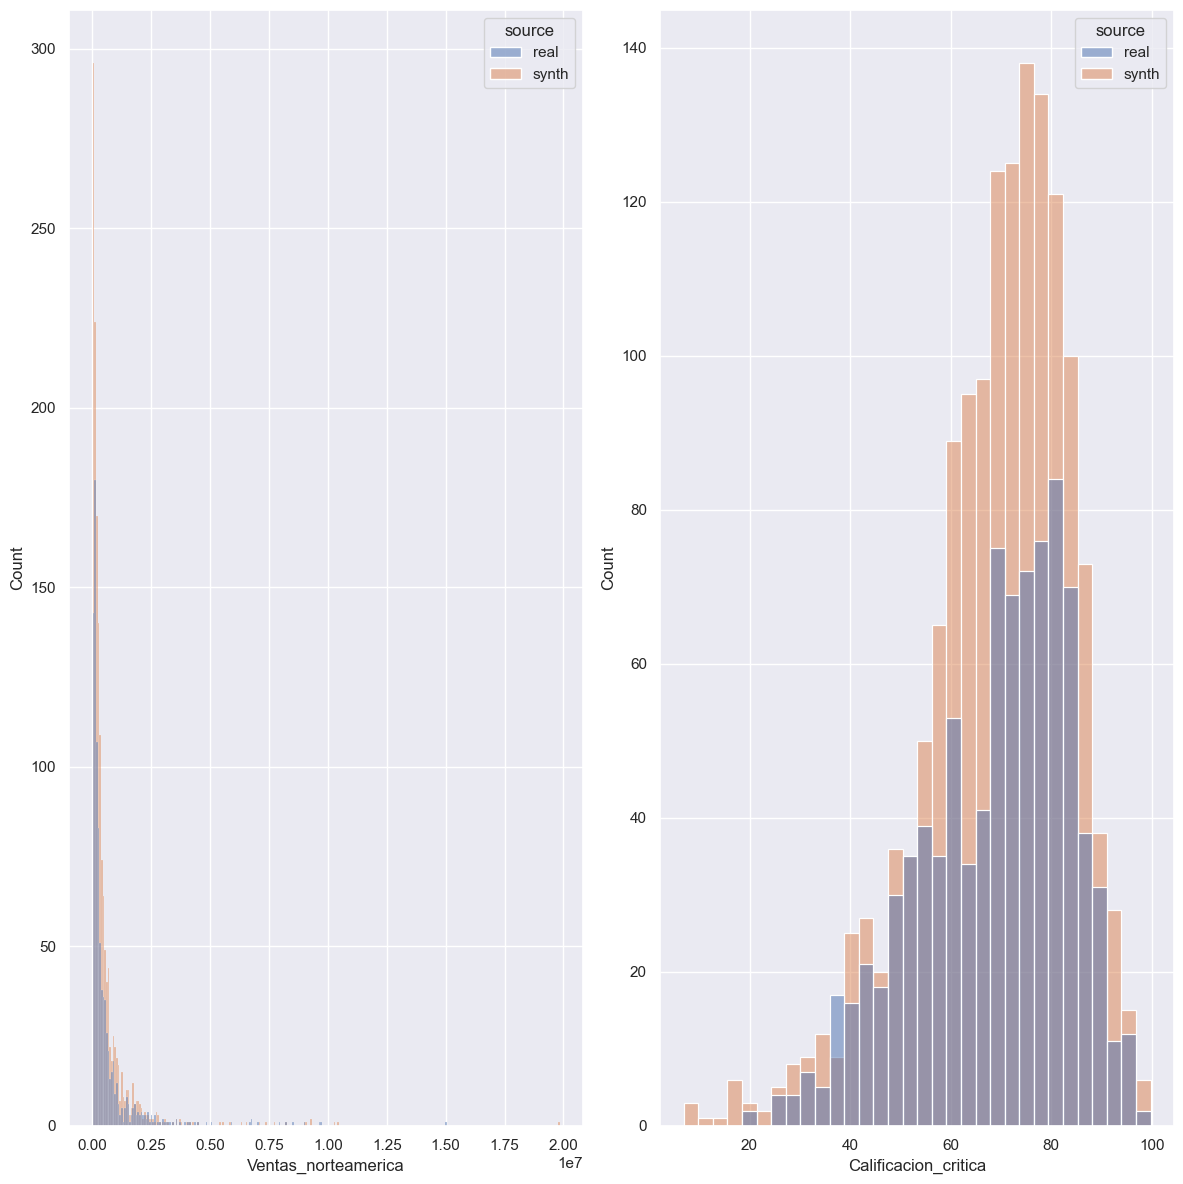

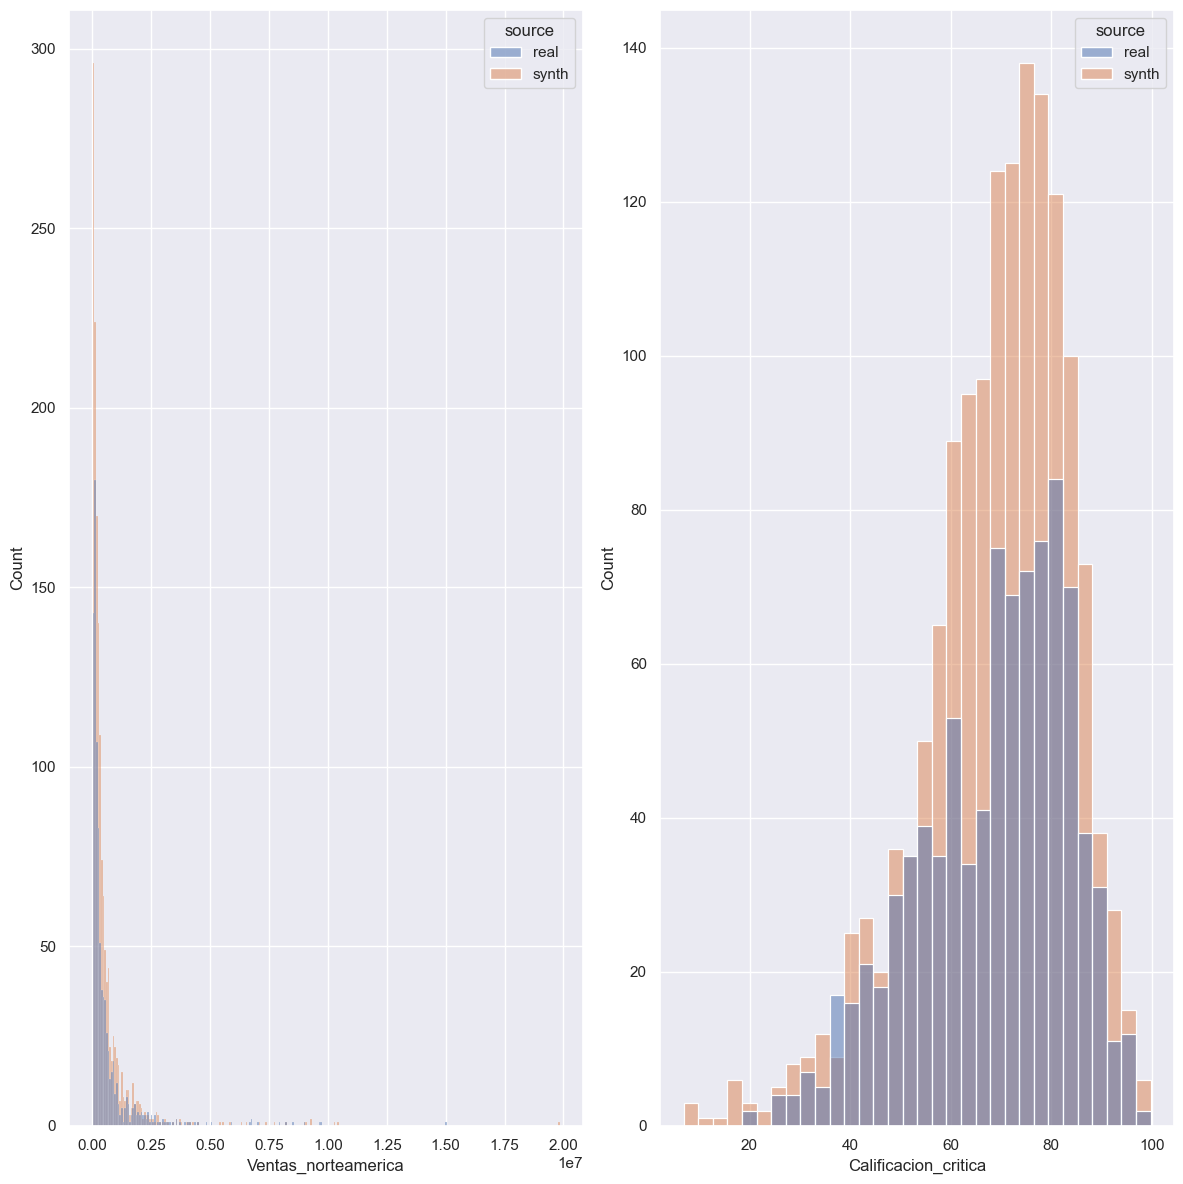

In [140]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [141]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,1.197277
wass-Ventas_norteamerica,65945.860717
kolmogorov-Calificacion_critica-statistic,0.053756
kolmogorov-Calificacion_critica-pvalue,0.073817
kolmogorov-Ventas_norteamerica-statistic,0.084070
kolmogorov-Ventas_norteamerica-pvalue,0.000648
propensity_metrics-pmse,0.223611
propensity_metrics-pmse_standardised,0.425574
propensity_metrics-pmse_ratio,1.001882
pearson-msd,0.196941


In [142]:
comparison_evaluator = sg.Evaluator(xbreal, xbsyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,725.0,69.859310,14.061411,19.000000,62.000000,72.000000,80.000000,9.700000e+01
Calificacion_critica_synth,1500.0,70.232549,13.748902,17.653978,62.064566,72.804847,80.576903,9.546136e+01
Ventas_norteamerica_real,725.0,234427.586207,414844.521645,10000.000000,50000.000000,110000.000000,270000.000000,6.820000e+06
Ventas_norteamerica_synth,1500.0,240257.568948,226281.112155,10048.950034,72256.029147,169155.317548,334281.339687,1.575377e+06


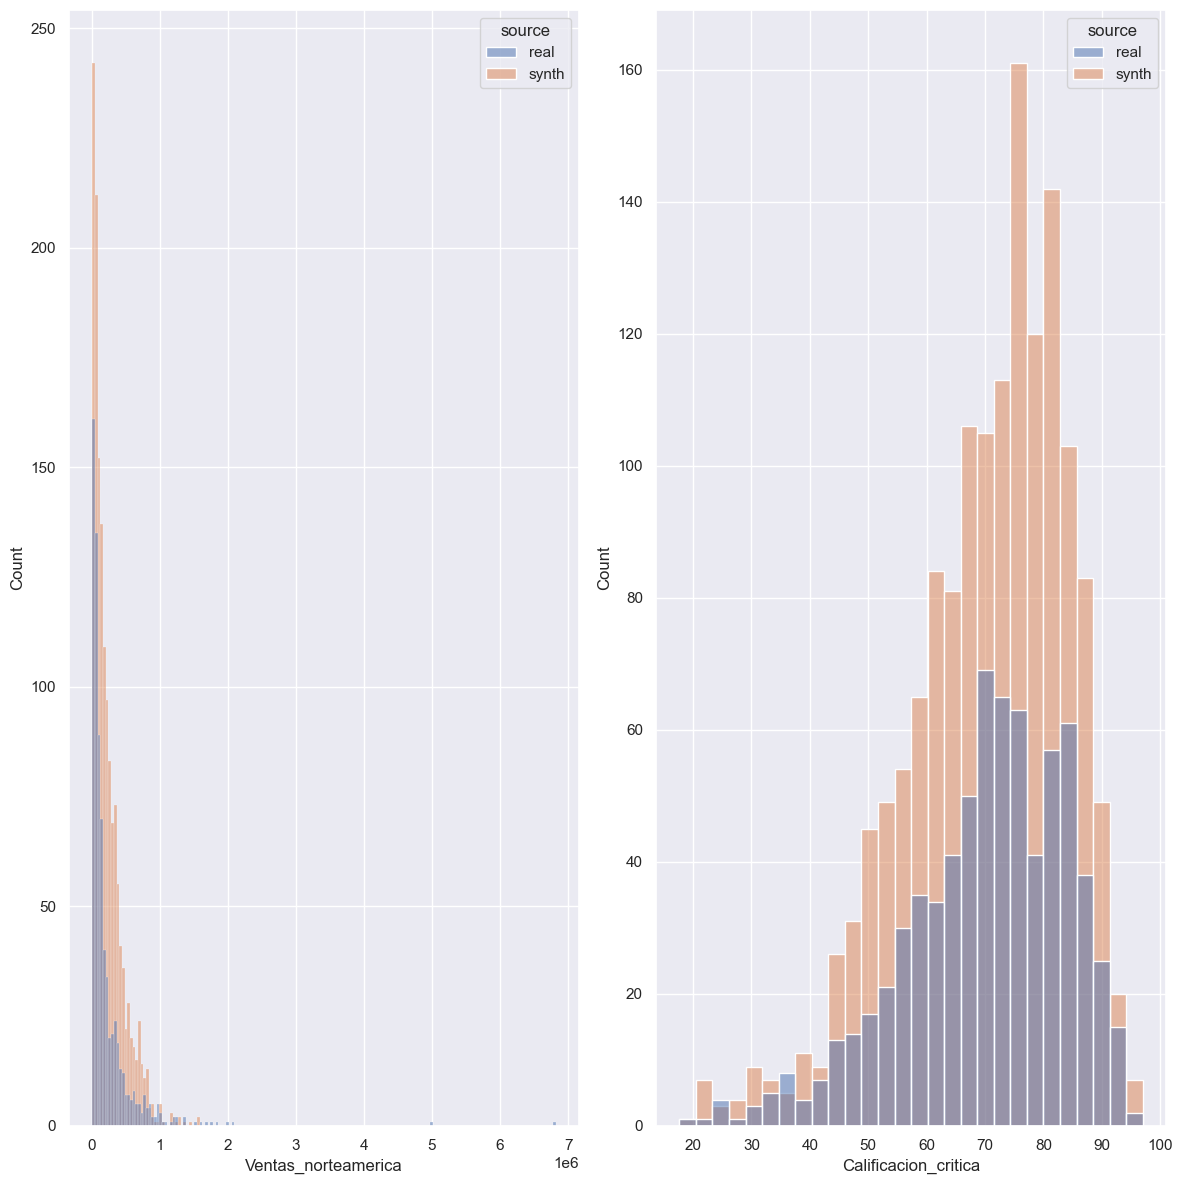

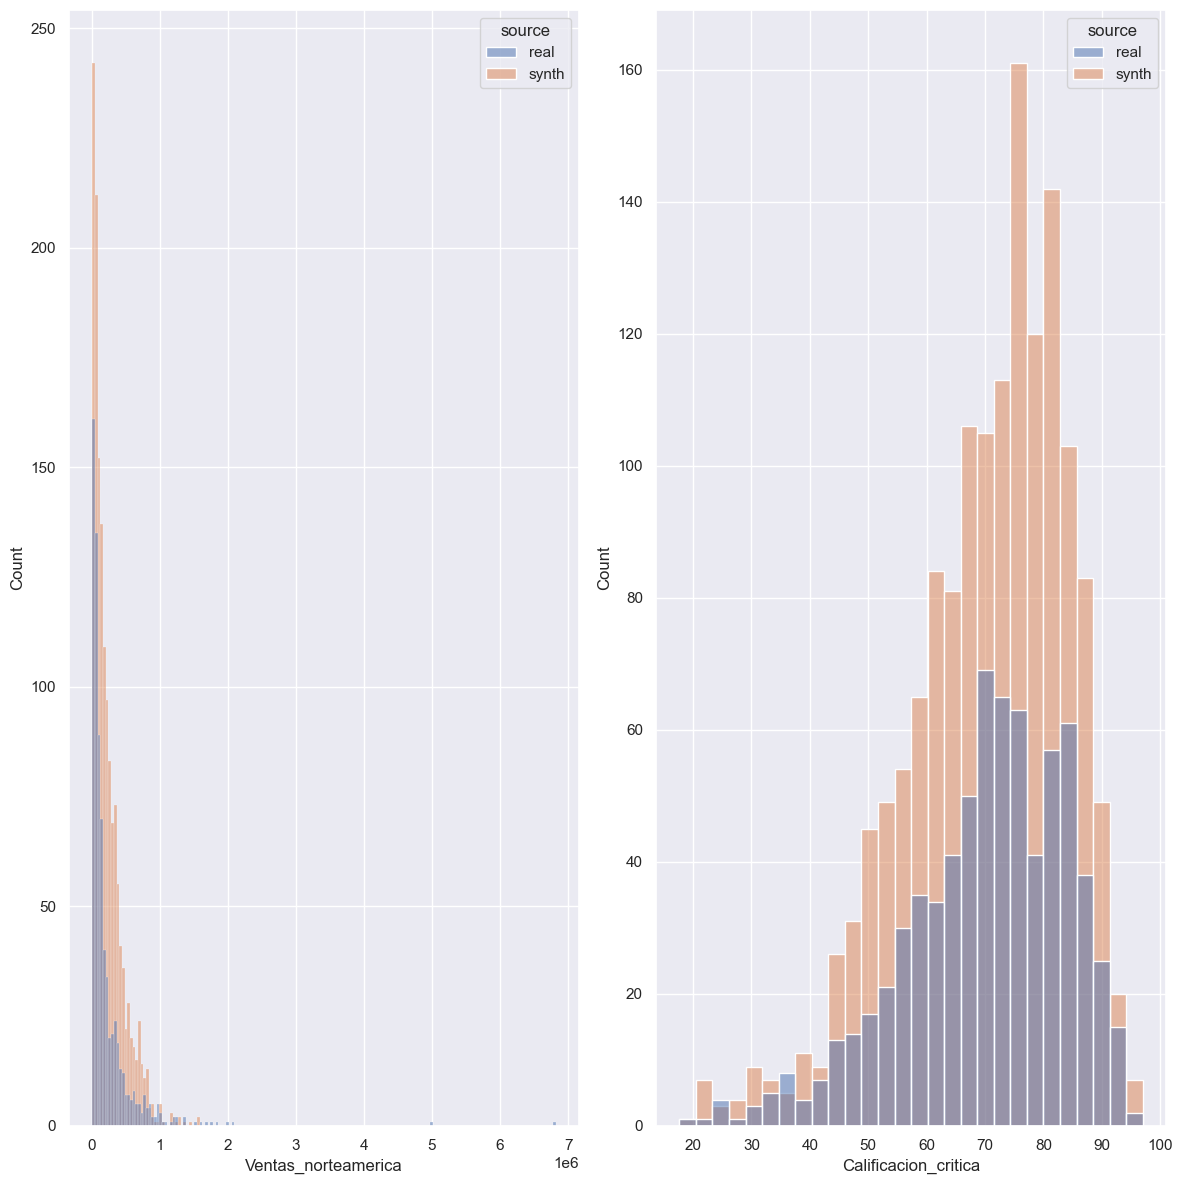

In [143]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [144]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,5.980112e-01
wass-Ventas_norteamerica,6.607207e+04
kolmogorov-Calificacion_critica-statistic,5.041379e-02
kolmogorov-Calificacion_critica-pvalue,1.598385e-01
kolmogorov-Ventas_norteamerica-statistic,1.600000e-01
kolmogorov-Ventas_norteamerica-pvalue,2.146337e-11
propensity_metrics-pmse,2.049651e-01
propensity_metrics-pmse_standardised,-1.966392e-01
propensity_metrics-pmse_ratio,9.987480e-01
pearson-msd,1.588238e-01


In [145]:
comparison_evaluator = sg.Evaluator(xonereal, xonesyn)
comparison_evaluator.describe_numeric()

,count,mean,std,min,25%,50%,75%,max
Calificacion_critica_real,161.0,73.645963,13.040998,20.000000,68.000000,76.000000,83.000000,9.700000e+01
Calificacion_critica_synth,1500.0,72.619168,13.610695,-19.141011,66.700938,75.237139,81.542506,1.139504e+02
Ventas_norteamerica_real,161.0,472732.919255,637742.098714,10000.000000,70000.000000,220000.000000,630000.000000,3.220000e+06
Ventas_norteamerica_synth,1500.0,629411.405838,803583.279157,10086.305537,58185.976021,248572.074553,918100.665467,3.210154e+06


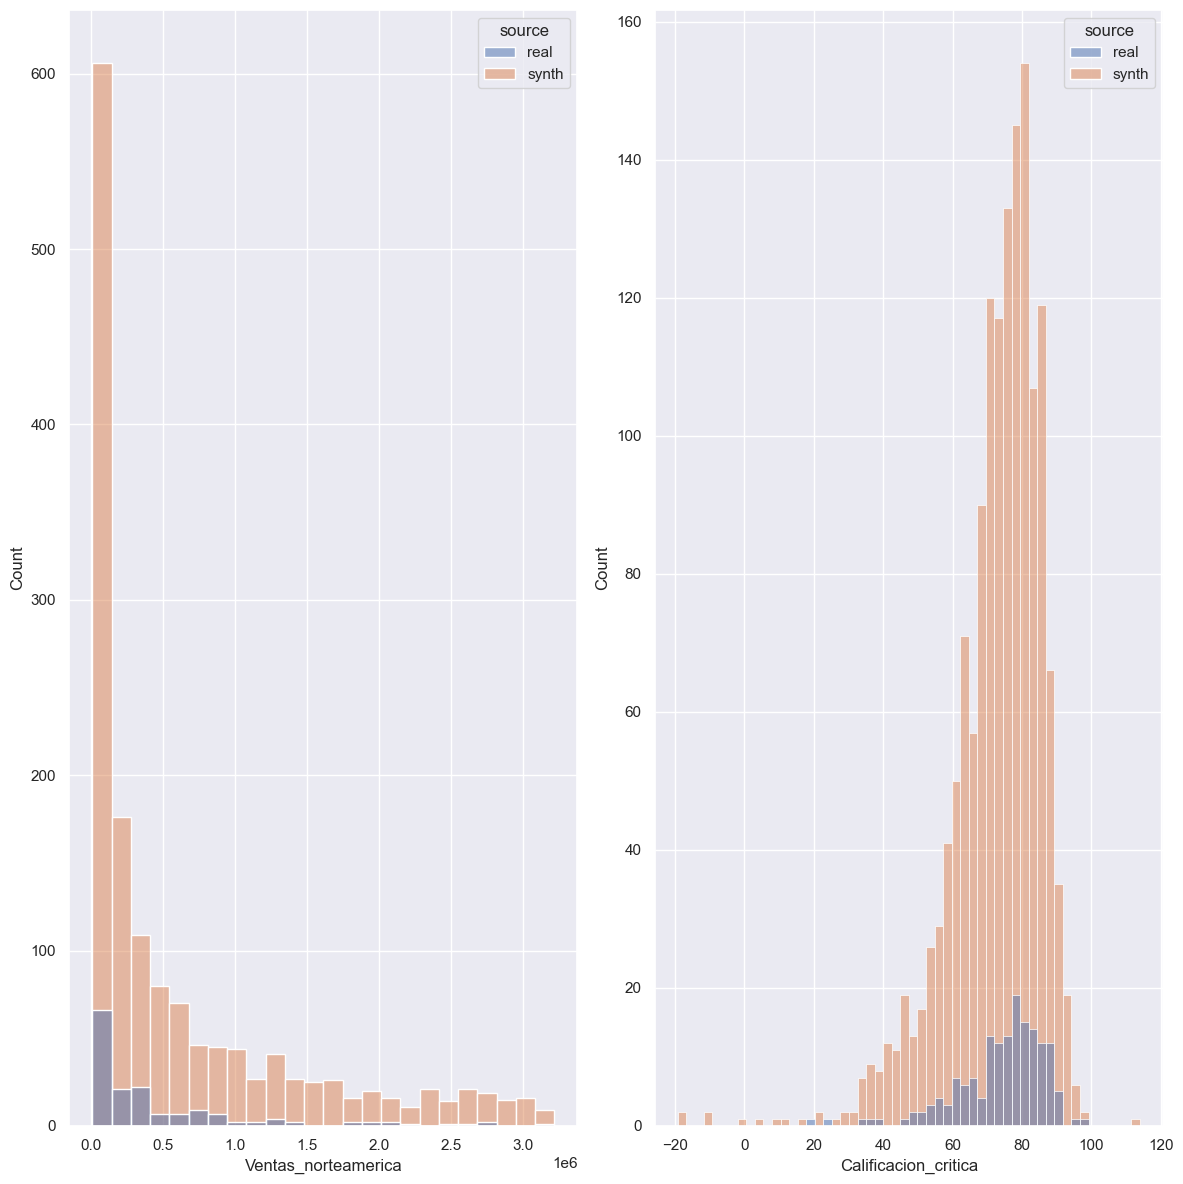

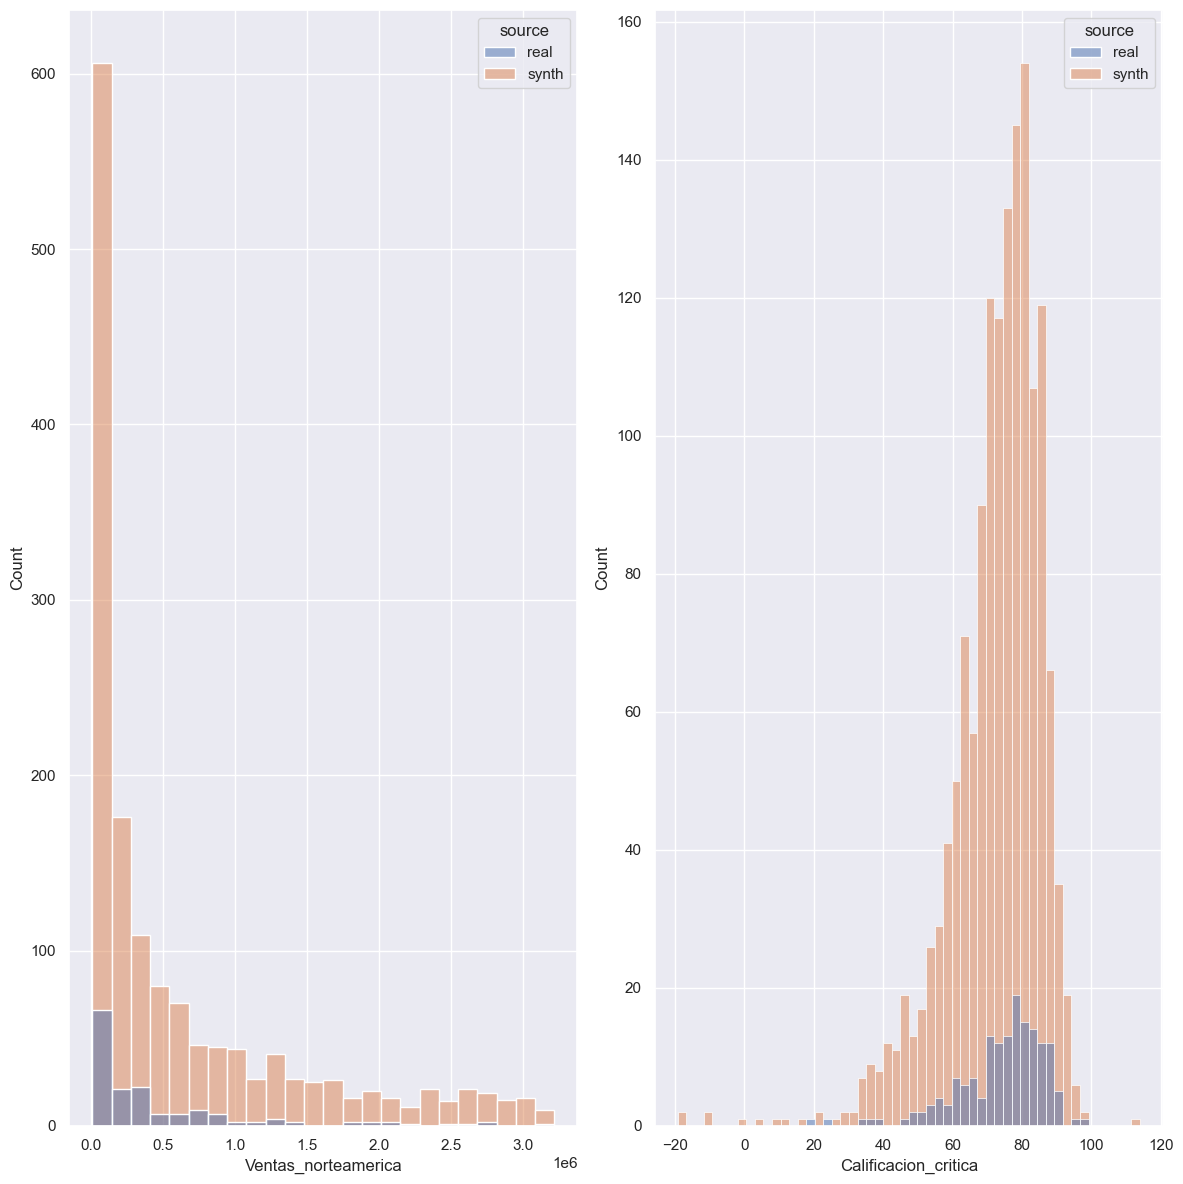

In [146]:
comparison_evaluator.plot_histograms(figsize=(12, 12))
 

In [147]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


,value
wass-Calificacion_critica,1.267371
wass-Ventas_norteamerica,160824.424708
kolmogorov-Calificacion_critica-statistic,0.077118
kolmogorov-Calificacion_critica-pvalue,0.334054
kolmogorov-Ventas_norteamerica-statistic,0.117354
kolmogorov-Ventas_norteamerica-pvalue,0.033296
propensity_metrics-pmse,0.087233
propensity_metrics-pmse_standardised,-0.054313
propensity_metrics-pmse_ratio,0.999827
pearson-msd,0.166835
